# **Food Beverage Industry Analysis Report**

# **รายชื่อสมาชิก**

## 1. 6510405750 นายภูมิระพี เสริญวณิชกุล     sec1   

### หน้าที่และความรับผิดชอบ
- ทำ Insight 1 หัวข้อ,  ทำ slide, ทำการ Visualize ข้อมูลเบื้องต้น, รวมไฟล์ & จัดไฟล์ , ส่งงาน

## 2. 6510450194 นางสาวกานต์นิตรา สุขพานิช   sec 200

### หน้าที่และความรับผิดชอบ
- ทำ Insight 2 หัวข้อ,  ทำ slide, ทำความสะอาดข้อมูลทั้งหมด

## 3. 6510450674 นางสาวปุญญิศา ธัญญพงษ์    sec 200

### หน้าที่และความรับผิดชอบ
- ทำ Insight 2 หัวข้อ,  ทำ slide , ทำการ Visualize ข้อมูลเบื้องต้น

# **แหล่งที่มา (Source)**

### **แหล่งที่มา** :  website [Kaggle](https://www.kaggle.com/datasets/ad043santhoshs/food-and-beverage-industry) 
### **ผู้จัดหาข้อมูล** : Santhosh S

### **รายละเอียดข้อมูล**

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

เลือกข้อมูลจากการสำรวจพฤติกรรมการบริโภคเครื่องดื่มของผู้คนในประเทศอินเดีย ซึ่งได้ข้อมูลมาในรูปแบบของ excel

In [216]:
#นำเข้าข้อมูลจาก excel
df = pd.read_csv('Food Beverage Industry.csv')
df

,Column1,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103006,120036,Rarely,For mental alertness,To combat fatigue,Yes,Negative,Not sure,No,5,...,Yes,Above 150,Gyms and fitness centers,Social outings/parties,Zeeshan Ratta,19-30,Female,CT118,Pune,Tier 2
3,103007,120037,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,Positive,Not sure,No,4,...,Yes,100-150,Other,Sports/exercise,Oorja Anne,19-30,Male,CT112,Mumbai,Tier 1
4,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,...,Yes,100-150,Supermarkets,Studying/working late,Arnav Kale,31-45,Male,CT112,Mumbai,Tier 1
9996,112997,130027,Daily,To stay awake during work/study,To combat fatigue,No,Positive,Healthy,Yes,2,...,Yes,50-99,Online retailers,Social outings/parties,Yuvraj Agrawal,15-18,Male,CT113,Bangalore,Tier 1
9997,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,...,No,100-150,Other,Sports/exercise,Vardaniya Chauhan,31-45,Male,CT114,Chennai,Tier 1
9998,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,...,Not Sure,50-99,Supermarkets,Studying/working late,Jayan Goyal,19-30,Male,CT113,Bangalore,Tier 1


##### ชุดข้อมูลนี้เป็นชุดข้อมูลเกี่ยวกับพฤติกรรมการบริโภคเครื่องดื่มของผู้คนในประเทศอินเดีย โดยประกอบด้วยคำตอบจากการสำรวจทั้งหมด 10000 ตัวอย่าง และมีทั้งหมด 29 คอลัมน์

#### **Meta Data** ของชุดข้อมูลที่ได้จากการสำรวจ

##### **ข้อมูลทั่วไป** 
- `Consume_frequency`: ความถี่ในการบริโภคสินค้า (Times, Daily, Once a week, Rarely)
- `Consume_time`: เวลาที่ทำการบริโภค (ช่วงเวลา)
- `Consume_reason`: เหตุผลที่เลือกบริโภค (ความต้องการ)

##### **ข้อมูลเกี่ยวกับแบรนด์** 
- `Current_brands`: แบรนด์ที่ใช้ในปัจจุบัน
- `Reasons_for_choosing_brands`: เหตุผลที่เลือกบริโภคแบรนด์ดังกล่าว (ความคิดเห็น) 
- `Heard_before`: การทราบข้อมูลหรือได้ยินเกี่ยวกับสินค้าหรือบริการก่อนหน้า (Yes, No)
- `Brand_perception`: มุมมองหรือความรู้สึกต่อแบรนด์ (Positive, Negative, Neutral)
- `General_perception`: มุมมองหรือความรู้สึกทั่วไป (ความรู้สึก)

##### **ข้อมูลเกี่ยวกับผลิตภัณฑ์** 
- `Taste_experience`: การให้คะแนนที่ได้จากการลองใช้ (1-5)
- `Reasons_preventing_trying`: เหตุผลที่ขัดขวางการลองใช้ 
- `Tried_before`: ลองใช้สินค้าหรือบริการก่อนหน้า (Yes, No)
- `Improvements_desired`: การปรับปรุงที่ต้องการ 
- `Ingredients_expected`: ส่วนประกอบที่คาดหวัง 
- `Health_concerns`: ความกังวลในเรื่องสุขภาพ 
- `Interest_in_natural_or_organic`: ความสนใจในสินค้าธรรมชาติหรืออินทรีย์

##### **ข้อมูลเกี่ยวกับการตลาด** 
- `Marketing_channels`: ช่องทางการตลาดที่ใช้ 
- `Packaging_preference`: ลักษณะ packaging ที่ชอบ
- `Limited_edition_packaging`: จะเลือกซื้อมั้ยถ้าเป็น packaging แบบ limited
##### **ข้อมูลเกี่ยวกับการซื้อ** 
- `Price_range`: ช่วงราคาที่ยอมจ่าย 
- `Purchase_location`: สถานที่ที่ซื้อ 
- `Typical_consumption_situations`: สถานการณ์ที่ทำให้กิน 
##### **ข้อมูลส่วนตัว** 
- `Name`: ชื่อของบุคคล
- `Age`: อายุของบุคคล 
- `Gender`: เพศของบุคคล 
- `City`: ชื่อเมือง 

# **การทำความสะอาดข้อมูล**

In [217]:
df.head(5)

,Column1,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103006,120036,Rarely,For mental alertness,To combat fatigue,Yes,Negative,Not sure,No,5,...,Yes,Above 150,Gyms and fitness centers,Social outings/parties,Zeeshan Ratta,19-30,Female,CT118,Pune,Tier 2
3,103007,120037,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,Positive,Not sure,No,4,...,Yes,100-150,Other,Sports/exercise,Oorja Anne,19-30,Male,CT112,Mumbai,Tier 1
4,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1


In [218]:
#การตรวจสอบข้อมูลเพื่อหา missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Column1                         10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

จากการสำรวจไม่พบ Missing Data และพบว่ามี 4 คอลัมน์ที่ไม่เกี่ยวข้องต่อการวิเคราะห์ข้อมูล นั่นคือ Column1(ลำดับคอลัมน์), Respondent_ID (ID ของผู้ตอบแบบสอบถาม), City_ID (รหัสประเทศ), Tier (ระดับอาหาร)

#### **การทำความสะอาดข้อมูล**

ลบคอลัมน์ที่ไม่เกี่ยวข้องต่อการวิเคราะห์ข้อมูล นั่นคือ Column1(ลำดับคอลัมน์), Respondent_ID (ID ของผู้ตอบแบบสอบถาม), City_ID (รหัสประเทศ), Tier (ระดับอาหาร)

In [219]:
df = df.drop(['Column1', 'Respondent_ID', 'City_ID', 'Tier'], axis=1)
df.head(1)

,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,...,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City
0,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,...,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,Ahmedabad


# **การวิเคราะห์ข้อมูลเชิงสำรวจเบื้องต้น**

In [220]:
df.head(5)

,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,...,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City
0,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,...,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,Ahmedabad
1,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,...,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,Pune
2,Rarely,For mental alertness,To combat fatigue,Yes,Negative,Not sure,No,5,Health concerns,Cola-Coka,...,TV commercials,Other,Yes,Above 150,Gyms and fitness centers,Social outings/parties,Zeeshan Ratta,19-30,Female,Pune
3,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,Positive,Not sure,No,4,Health concerns,Cola-Coka,...,Online ads,Innovative bottle design,Yes,100-150,Other,Sports/exercise,Oorja Anne,19-30,Male,Mumbai
4,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,...,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,Hyderabad


#### **Visualize Data**

##### **กราฟแสดงช่วงอายุของผู้คนที่ได้จากการสำรวจข้อมูลโดยรวม**

In [221]:
# แสดงตารางจำนวนอายุของู้คนที่ได้จากการสำรวจข้อมูล
age = df[['Age']].groupby(['Age']).size().to_frame(name='Total').reset_index()
age

,Age,Total
0,15-18,1488
1,19-30,5520
2,31-45,2376
3,46-65,426
4,65+,190


<Axes: xlabel='Age', ylabel='Total'>

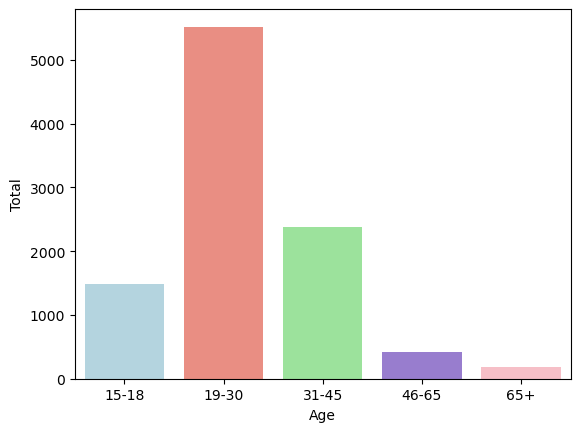

In [222]:
sns.barplot(x='Age', y='Total',palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink'], data=age)

จากกราฟพบว่าผู้คนที่ได้มาจากสำรวจมากที่สุดอยู่ในช่วงอายุ 19-30 ปีหรือทั้งหมด 5520 คนและผู้คนที่ได้มาจากสำรวจน้อยที่สุดอยู่ในช่วงอายุ 65 ปีขึ้นไปหรือทั้งหมด 190 คน

##### **กราฟแสดงเพศของผู้คนที่ได้จากการสำรวจข้อมูล**

In [223]:
# แสดงตารางจำนวนเพศของผู้คนที่ได้จากการสำรวจข้อมูล
gender = df[['Gender']].groupby(['Gender']).size().to_frame(name='Total').reset_index()
gender

,Gender,Total
0,Female,3455
1,Male,6038
2,Non-binary,507


<Axes: xlabel='Gender', ylabel='Total'>

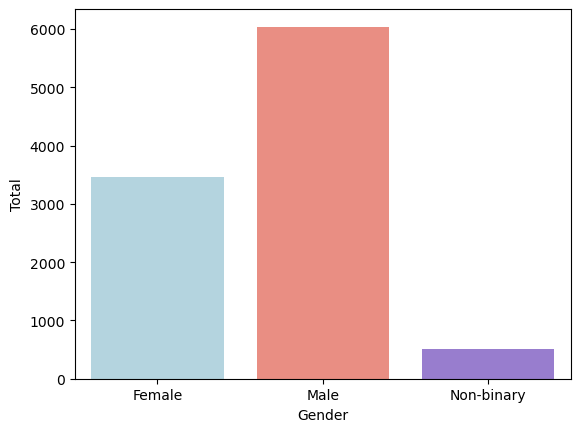

In [224]:
sns.barplot(x='Gender', y='Total',palette= ['lightblue','salmon','mediumpurple','lightpink'], data=gender)

จากการสำรวจพบว่าเพศของผู้คนที่ได้มาจากสำรวจมากที่สุดคือเพศชายซึ่งมีทั้งหมด 6038 คนและเพศของผู้คนที่ได้มาจากสำรวจน้อยที่สุดคือนอนไบนารี ซึ่งมีทั้งหมด 507 คน

##### **กราฟแสดงจำนวนการเลือกแบรนด์เครื่องดื่มตามช่วงอายุ**

In [225]:
# การสร้างตารางสรุปข้อมูลเพื่อทำการวิเคราะห์และทำการ visualize
interest_brands_age = df[['Age','Current_brands','Gender']].groupby(['Current_brands','Age']).size().to_frame(name='Total').reset_index()
interest_brands_age.head(5)

,Current_brands,Age,Total
0,Bepsi,15-18,278
1,Bepsi,19-30,1192
2,Bepsi,31-45,521
3,Bepsi,46-65,87
4,Bepsi,65+,34


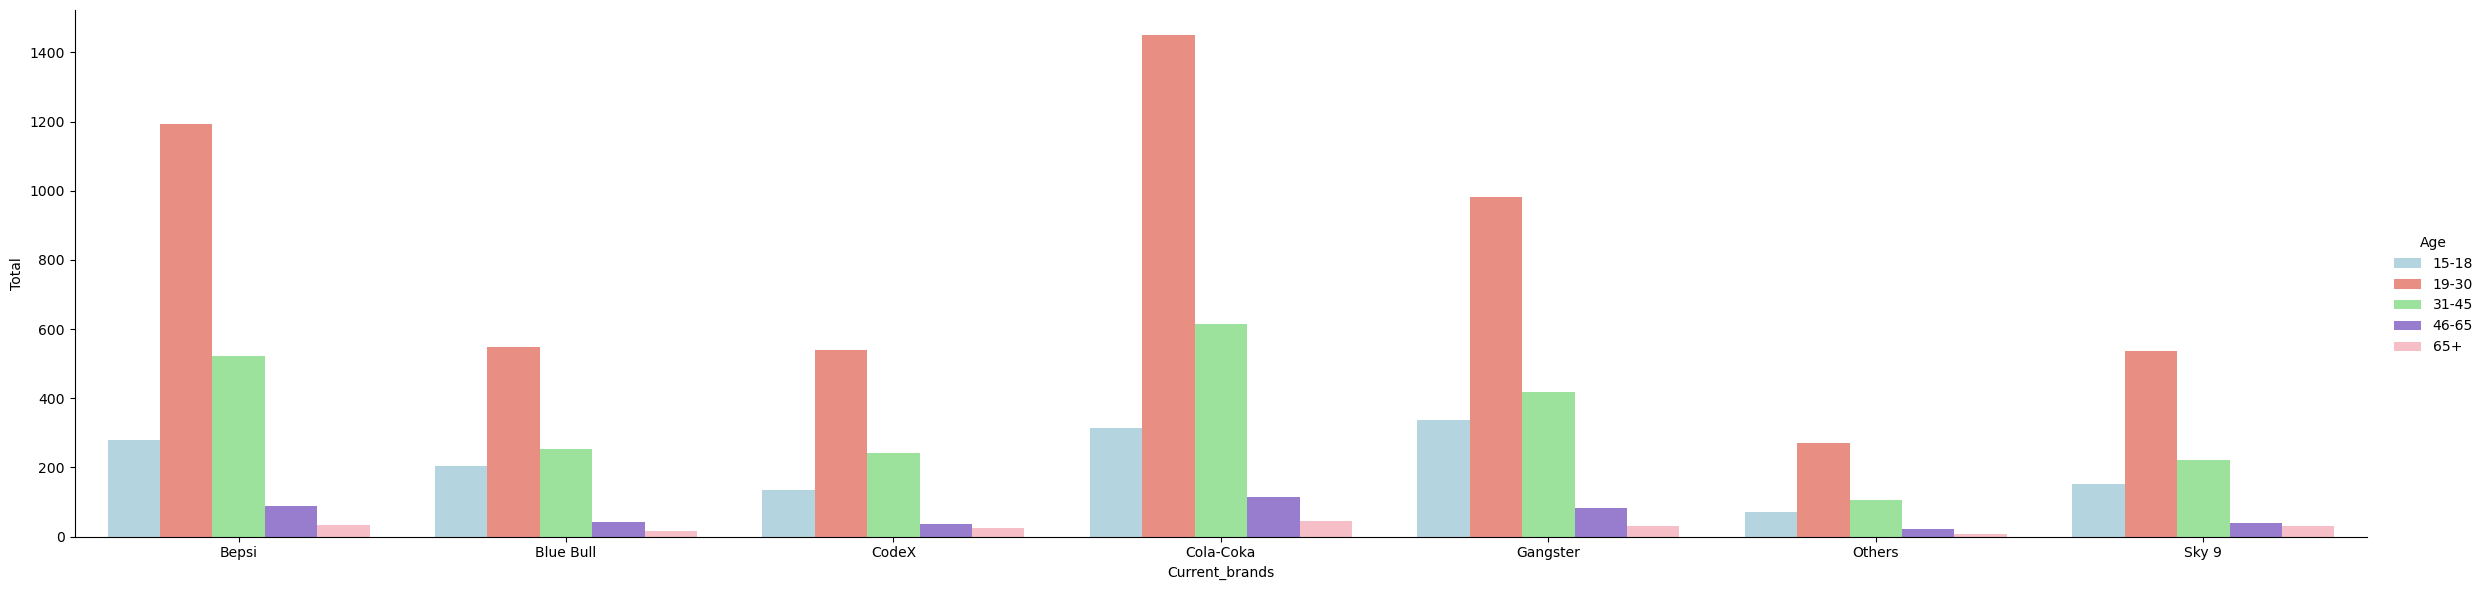

In [226]:
sns.catplot(x="Current_brands", y="Total", hue="Age", kind = 'bar', data=interest_brands_age, height=6, aspect=4 ,errorbar=None, palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink'])

จากการ visualize พบว่าในแต่ละแบรนด์มีกลุ่มลูกค้าในช่วงอายุ 19-30 ปีที่มีความสนใจเครื่องดื่มในทุกๆแบรนด์มากที่สุดและกลุ่มลูกค้าในช่วงอายุ 65 ปีขึ้นไป ที่มีความสนใจเครื่องดื่มในทุกๆแบรนด์น้อยที่สุด

##### **กราฟแสดงจำนวนการเลือกแบรนด์เครื่องดื่มตามเพศ**

In [227]:
# การสร้างตารางสรุปข้อมูลเพื่อทำการวิเคราะห์และทำการ visualize
interest_brands_gender = df[['Age','Current_brands','Gender']].groupby(['Current_brands','Gender']).size().to_frame(name='Total').reset_index()
interest_brands_gender.head(5)

,Current_brands,Gender,Total
0,Bepsi,Female,783
1,Bepsi,Male,1208
2,Bepsi,Non-binary,121
3,Blue Bull,Female,403
4,Blue Bull,Male,603


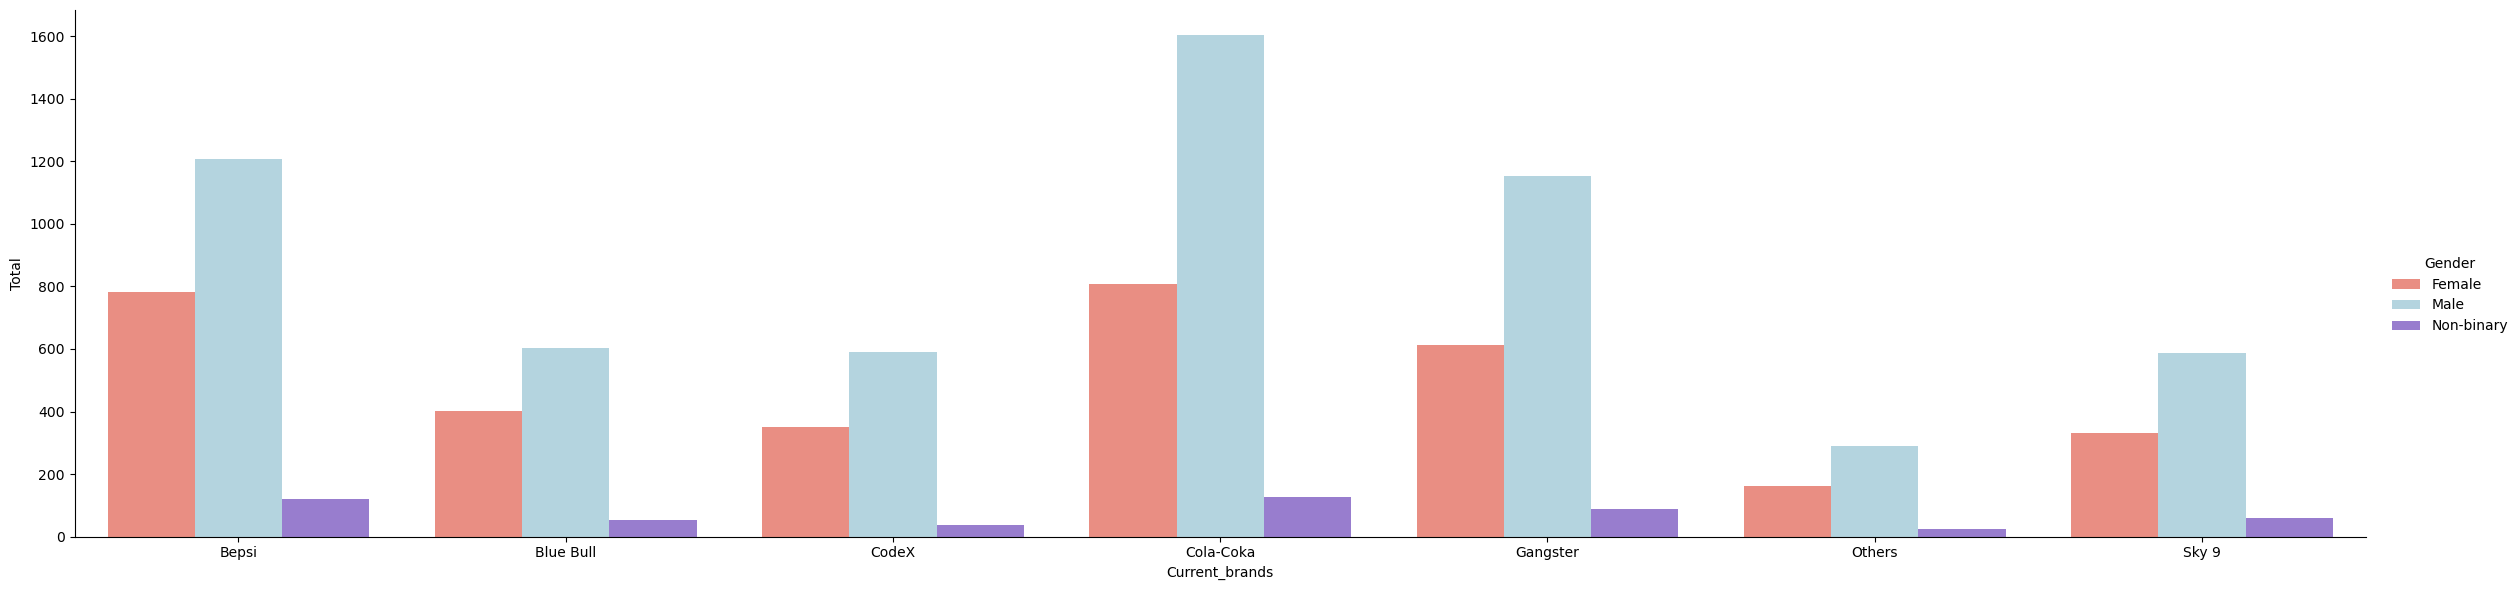

In [228]:
sns.catplot(x="Current_brands", y="Total", hue="Gender", kind='bar', data=interest_brands_gender, height=6, aspect=4 ,errorbar=None, palette= ['salmon','lightblue','mediumpurple'])

จากการทำการ visualize พบว่าในกลุ่มผู้ถูกสำรวจมีแนวโน้มที่มีความสนใจในเครื่องดื่มแต่ละแบรนด์ในทิศทางเดียวกัน โดย Cola-Coka, Bepsi และ Gangster ตามลำดับเป็น 3 แบรนด์ที่ได้รับความสนใจมากที่สุด

##### **กราฟแสดงความถี่ในการบริโภคสินค้าในแต่ละแบรนด์**

In [229]:
consume_frequency_brands = df[['Consume_frequency','Current_brands']].groupby(['Current_brands', 'Consume_frequency']).size().to_frame(name='Total').reset_index()

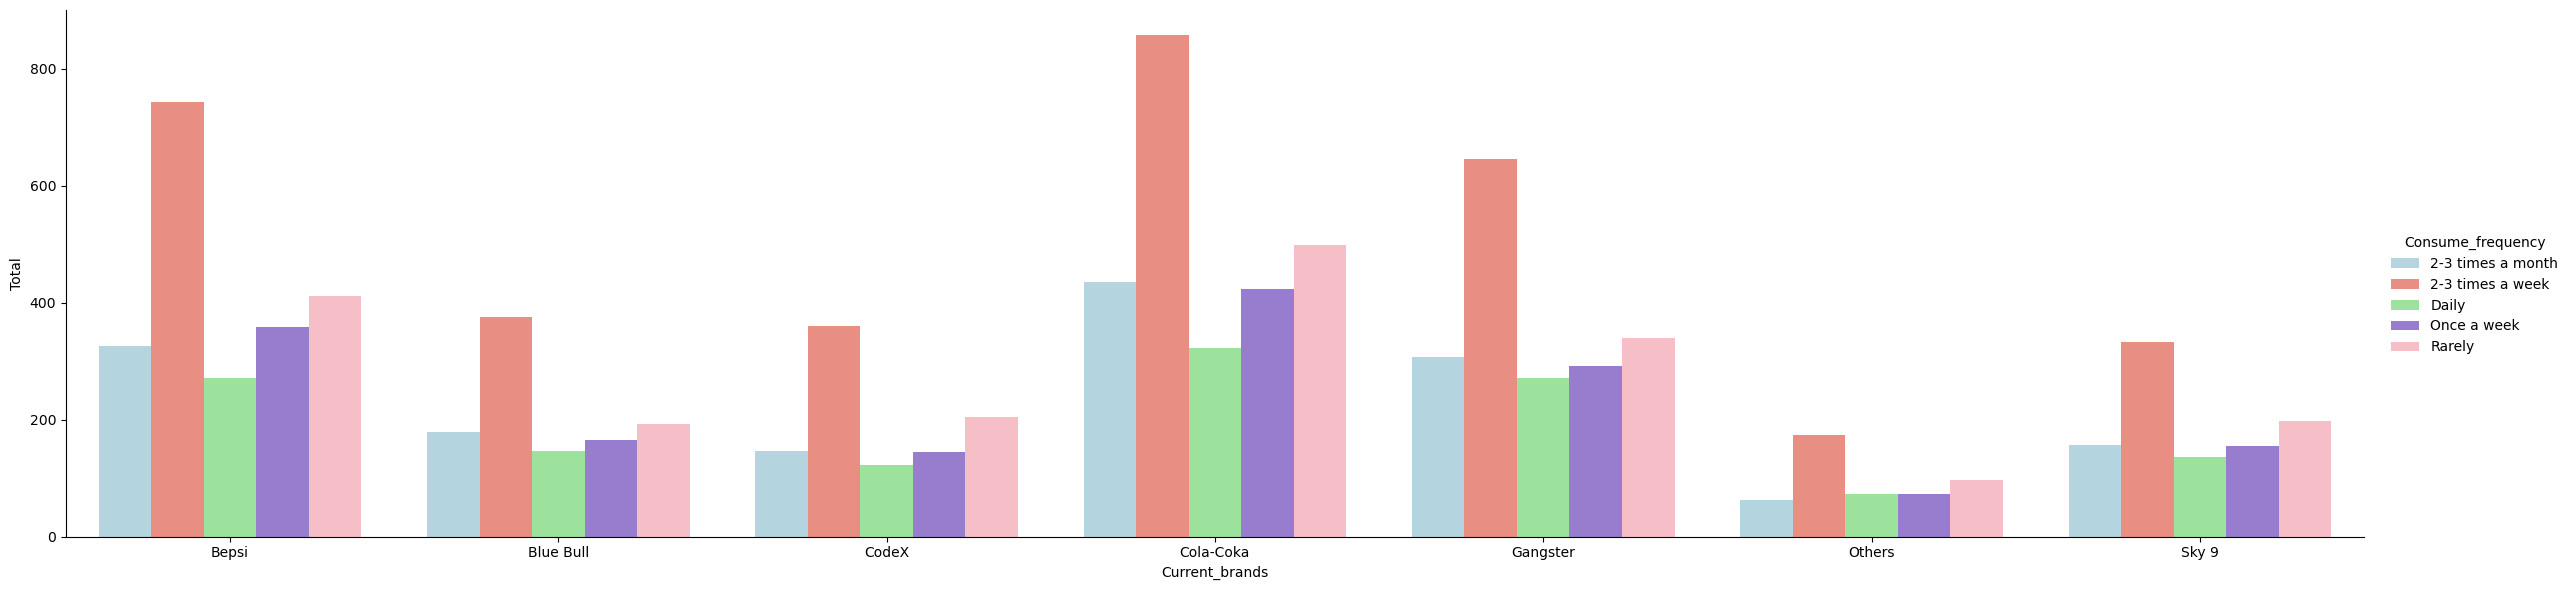

In [230]:
sns.catplot(x="Current_brands", y="Total", hue="Consume_frequency", kind='bar', data=consume_frequency_brands, height=6, aspect=4 ,errorbar=None, palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink'])

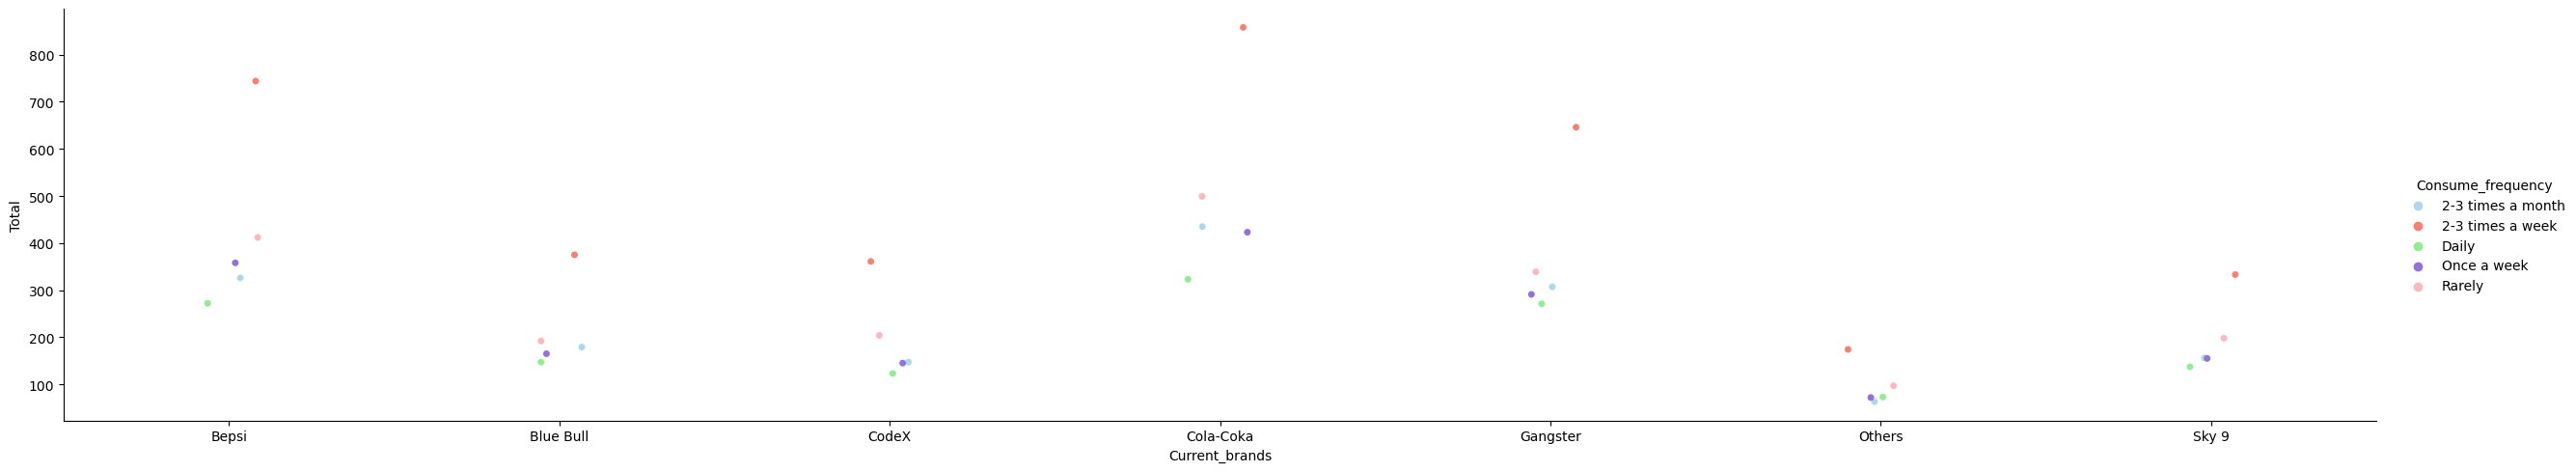

In [231]:
sns.catplot(data=consume_frequency_brands, x="Current_brands", y="Total", hue="Consume_frequency",kind='strip', palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink'], height=5, aspect=5)

In [232]:
consume_frequency_brands[consume_frequency_brands['Consume_frequency'] == '2-3 times a week'].sum()

Current_brands         BepsiBlue BullCodeXCola-CokaGangsterOthersSky 9
Consume_frequency    2-3 times a week2-3 times a week2-3 times a we...
Total                                                             3491
dtype: object

จากการ visualize แสดงให้เห็นว่าส่วนใหญ่ ผู้บริโภคมีความถี่ในการบริโภคสินค้าอยู่ที่ 2-3 ครั้งต่อสัปดาห์ โดยมีทั้งหมด 3491 คน

##### **กราฟแสดงช่วงราคาที่คนส่วนใหญ่ในเมืองนั้นๆยอมจ่าย**

In [233]:
city_price_range = df[['City', 'Price_range']].groupby(['City', 'Price_range']).size().to_frame(name='Total').reset_index()
city_price_range.head(5)

,City,Price_range,Total
0,Ahmedabad,100-150,144
1,Ahmedabad,50-99,180
2,Ahmedabad,Above 150,82
3,Ahmedabad,Below 50,50
4,Bangalore,100-150,881


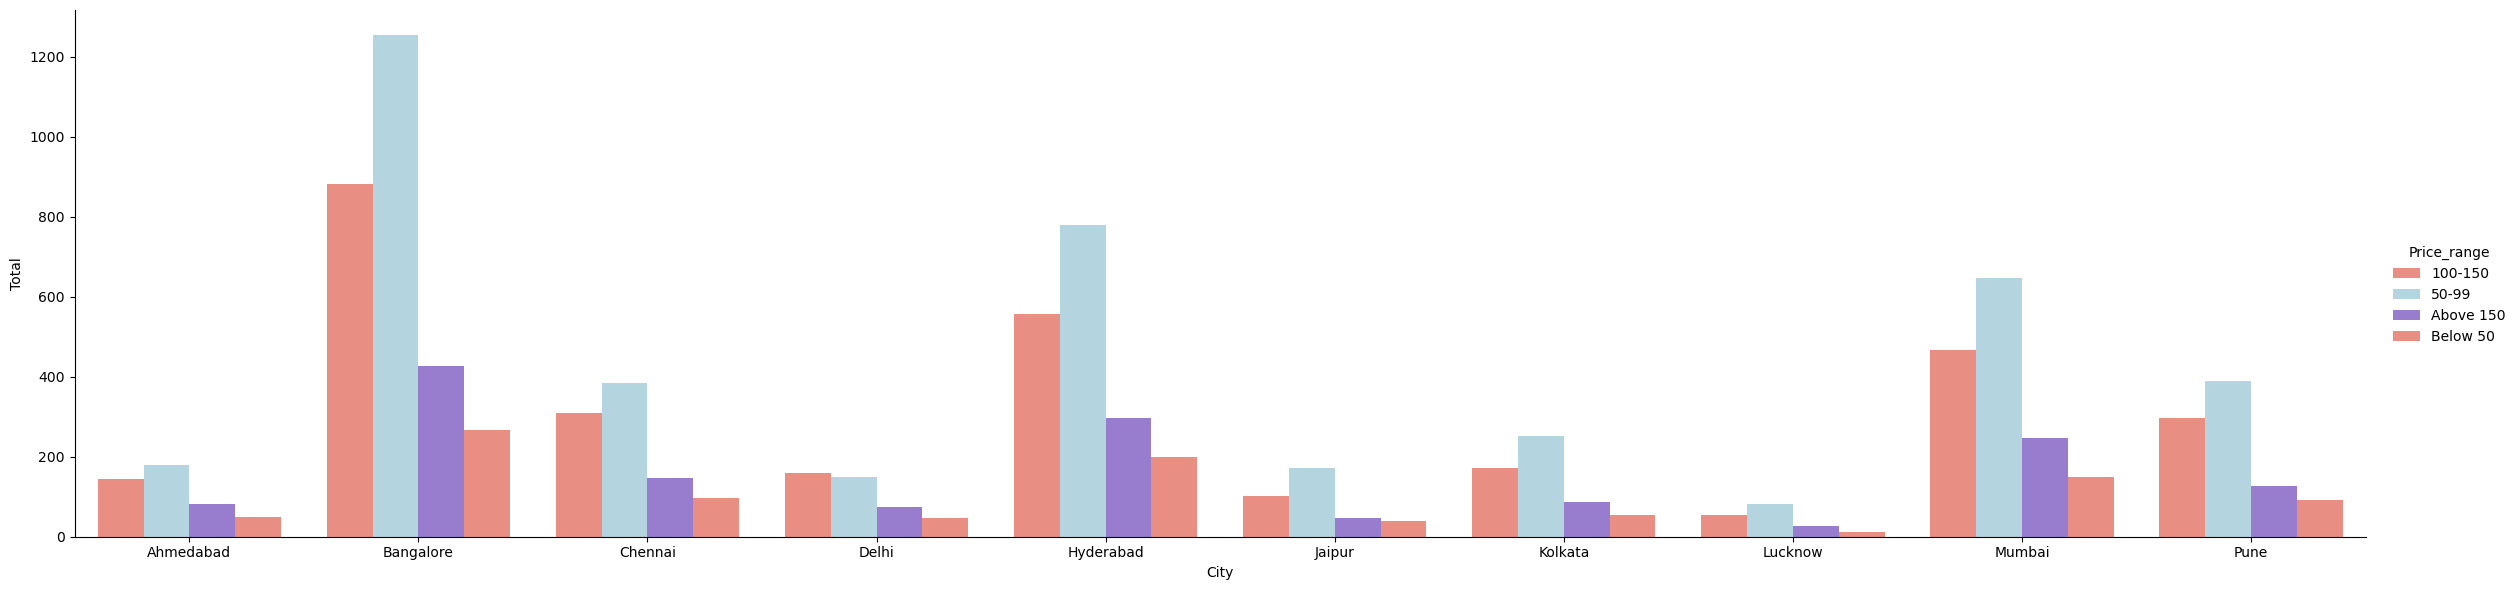

In [234]:
sns.catplot(x="City", y="Total", hue="Price_range", kind='bar', data=city_price_range, height=6, aspect=4 ,errorbar=None, palette= ['salmon','lightblue','mediumpurple'])

In [235]:
#หาช่วงราคาที่คนส่วนใหญ่ยอมจ่ายมากที่สุด
max_total_price_range = city_price_range.groupby('Price_range')['Total'].sum().idxmax()
high_price = city_price_range[city_price_range['Price_range'] == max_total_price_range]
high_price.sum()

City           AhmedabadBangaloreChennaiDelhiHyderabadJaipurK...
Price_range    50-9950-9950-9950-9950-9950-9950-9950-9950-995...
Total                                                       4288
dtype: object

จากการ Visualize พบว่าช่วงราคาที่คนส่วนใหญ่ในหลายๆเมืองยอมจ่ายคือช่วง 50-99 โดยมีจำนวนทั้งหมด 4288 คน โดยมีช่วงราคาที่ยอมจ่ายแตกต่างกันไปดังตารางต่อไปนี้

##### **ตารางแสดงช่วงราคาที่ผู้คนในแต่ละเมืองยอมจ่ายโดยเรียงจากมากไปน้อย**

In [236]:
# ชื่อเมืองทั้งหมด
cities = ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad','Jaipur	', 'Kolkata','Lucknow', 'Mumbai', 'Pune']

# วนลูปเพื่อสร้างและแสดงข้อมูลของแต่ละเมือง
for city in cities:
    # เรียงลำดับช่วงราคาที่ผู้คนยอมจ่ายโดยเรียงลำดับจากมากไปน้อย
    order_city = city_price_range[city_price_range['City'] == city]
    order_city = order_city.sort_values(by='Total', ascending=False)
    
    # แสดงข้อมูลเมืองแต่ละเมือง
    print(f"ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย {city}:")
    print(order_city)
    print()  # สร้างบรรทัดว่างระหว่างเมืองแต่ละเมือง

ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย Ahmedabad:
        City Price_range  Total
1  Ahmedabad       50-99    180
0  Ahmedabad     100-150    144
2  Ahmedabad   Above 150     82
3  Ahmedabad    Below 50     50

ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย Bangalore:
        City Price_range  Total
5  Bangalore       50-99   1254
4  Bangalore     100-150    881
6  Bangalore   Above 150    426
7  Bangalore    Below 50    267

ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย Chennai:
       City Price_range  Total
9   Chennai       50-99    384
8   Chennai     100-150    310
10  Chennai   Above 150    146
11  Chennai    Below 50     97

ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย Delhi:
     City Price_range  Total
12  Delhi     100-150    159
13  Delhi       50-99    149
14  Delhi   Above 150     74
15  Delhi    Below 50     47

ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย Hyderabad:
         City Price_range  Total
17  Hyderabad       50-99    780
16  Hyderabad     100-150    557
18  Hyderabad   Ab

จากในตารางจะเห็นได้ว่าผู้คนในเมืองส่วนใหญ่สามารถจ่ายสินค้าในราคาที่มากกว่า 50 ขึ้นไป

##### **กราฟแสดงคะแนนเฉลี่ยของความพึงพอใจในรสชาติของผู้บริโภคของแต่ละแบรนด์**

In [237]:
#หาค่าเฉลี่ยของความพึงพอใจในรสชาติของผู้บริโภค
score_brands = df[['Current_brands','Taste_experience']].groupby(['Current_brands']).mean().reset_index()
score_brands

,Current_brands,Taste_experience
0,Bepsi,3.275568
1,Blue Bull,3.297732
2,CodeX,3.273469
3,Cola-Coka,3.301812
4,Gangster,3.239482
5,Others,3.323591
6,Sky 9,3.295199


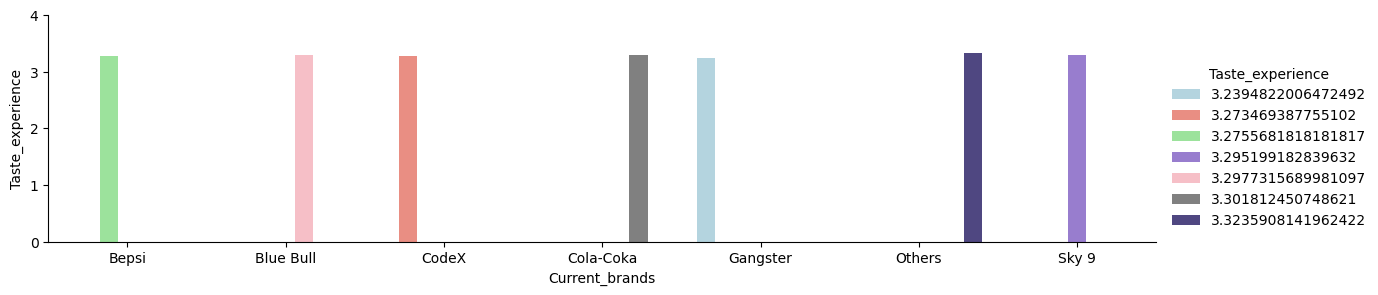

In [238]:
sns.catplot(x="Current_brands", y="Taste_experience", hue="Taste_experience", kind='bar',palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink','gray','darkslateblue'], data=score_brands, height=3, aspect=4 ,errorbar=None, estimator="mean")
plt.yticks(np.arange(0, 5, 1))
plt.show()

จากการสำรวจพบว่าทุกๆแบรนด์มีค่าเฉลี่ยที่ใกล้เคียงกัน โดยมีค่าประมาณ 3.20-3.30 คะแนน ซึ่งจะพบว่าแบรนด์ที่คะแนนรสชาติดีที่สุดนั่นคือแบรนด์อื่นๆซึ่งไม่ใช่จากที่สำรวจมา แต่หากอิงจากแบรนด์ที่สำรวจแล้วพบว่าแบรนด์ที่คะแนนรสชาติดีที่สุดนั่นคือ Cola-Coka ซึ่งมีคะแนนเฉลี่ยอยู่ที่ 3.301 คะแนน

##### **กราฟแสดงคนที่ซื้อสินค้าจากแต่ละที่**

In [239]:
#หาจำนวนคนที่ซื้อสินค้าจากแต่ละที่
location = df[['City', 'Purchase_location']].groupby(['City', 'Purchase_location']).size().to_frame(name='Total')
location

Total
City      Purchase_location              
Ahmedabad Gyms and fitness centers     62
          Local stores                 35
          Online retailers            111
          Other                        43
          Supermarkets                205
Bangalore Gyms and fitness centers    407
          Local stores                236
          Online retailers            719
          Other                       184
          Supermarkets               1282
Chennai   Gyms and fitness centers    133
          Local stores                 83
          Online retailers            246
          Other                        65
          Supermarkets                410
Delhi     Gyms and fitness centers     85
          Local stores                 27
          Online retailers            113
          Other                        28
          Supermarkets                176
Hyderabad Gyms and fitness centers    247
          Local stores                135
          Online retailers            476
          Other                       130
          Supermarkets                845
Jaipur    Gyms and fitness centers     53
          Local stores                 38
          Online retailers             87
          Other                        27
          Supermarkets                155
Kolkata   Gyms and fitness centers     87
          Local stores                 47
          Online retailers            137
          Other                        31
          Supermarkets                264
Lucknow   Gyms and fitness centers     20
          Local stores                 16
          Online retailers             39
          Other                        13
          Supermarkets                 87
Mumbai    Gyms and fitness centers    223
          Local stores                118
          Online retailers            407
          Other                        84
          Supermarkets                678
Pune      Gyms and fitness centers    147
          Local stores                 78
          Online retailers            215
          Other                        74
          Supermarkets                392

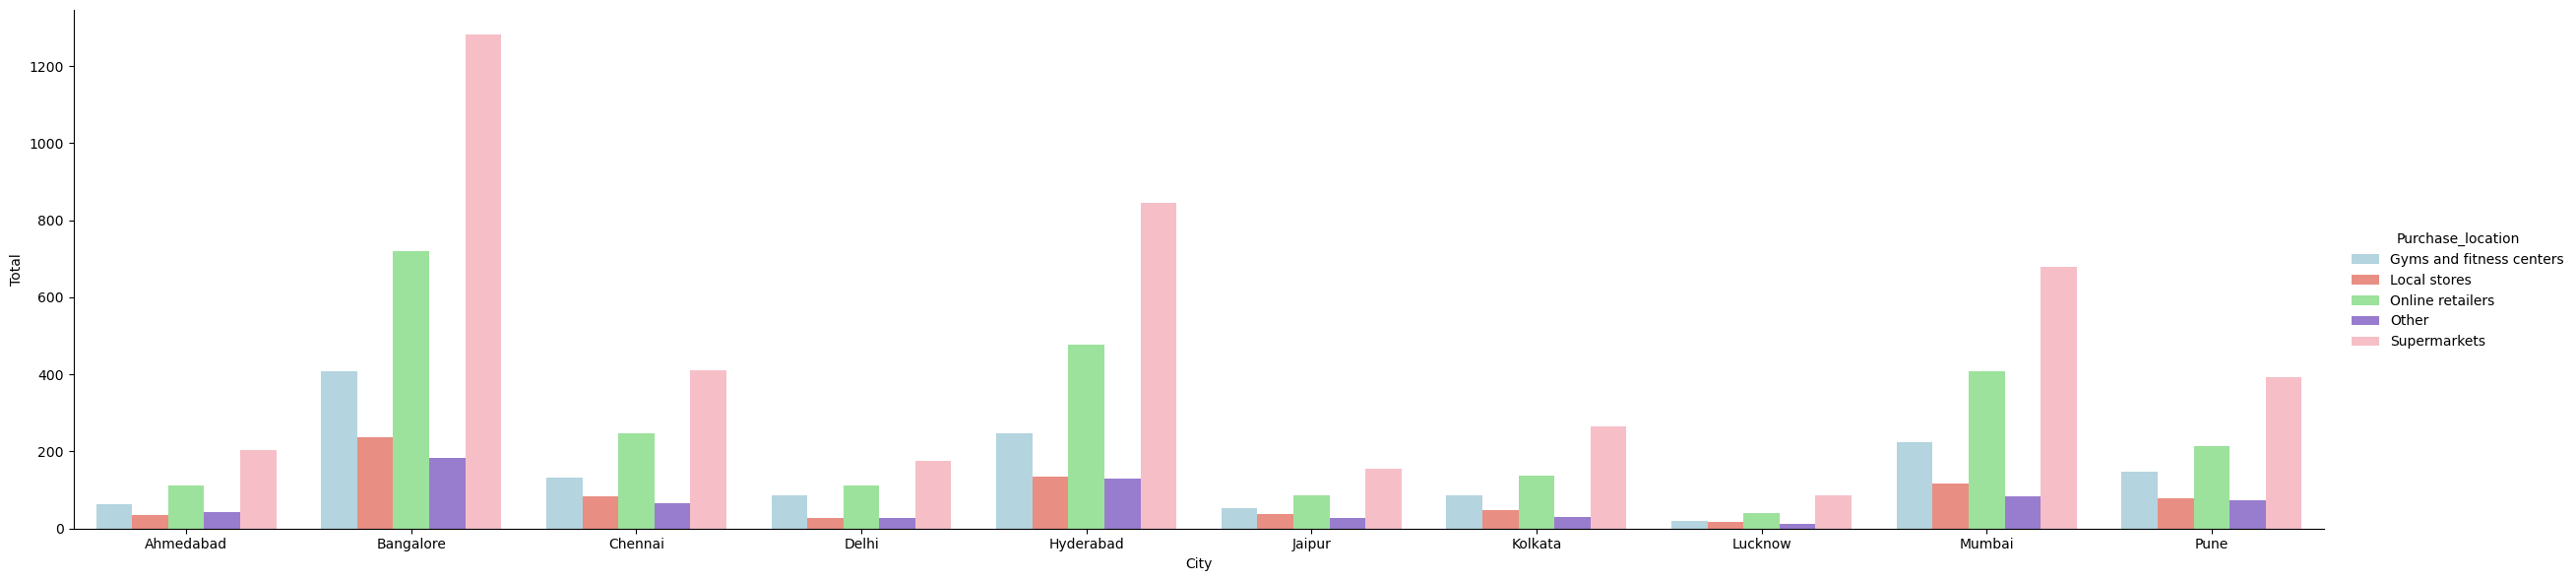

In [240]:
sns.catplot(x="City", y="Total", hue="Purchase_location", kind='bar', data=location.reset_index(), height=6, aspect=4 ,errorbar=None, palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink'])

จากการสำรวจพบว่าผู้บริโภคในุทุกๆเมืองมักจะซื้อสินค้าจาก Supermarket มากที่สุดตามด้วย ช่องทางออนไลน์และทางฟิตเนสตามลำดับ

# **ประเด็นที่น่าสนใจ**

## 1. ความกังวลเรื่องสุขภาพ

### จำนวนคนที่มีความกังวลเรื่องสุขภาพกับคนที่ไม่มีความกังวลเรื่องสุขภาพ

In [241]:
# กรองข้อมูลที่ระบุว่ามี Health Concerns เป็น "Yes" หรือ "No"
health_concerns_type_count = df[df['Health_concerns'].isin(['Yes', 'No'])]

# สร้างตารางสรุปจำนวนคนที่มีความกังวลเรื่องสุขภาพและไม่มีความกังวลเรื่องสุขภาพ
health_concerns_type_count = health_concerns_type_count.groupby('Health_concerns').size().reset_index(name='Count')

health_concerns_type_count

,Health_concerns,Count
0,No,3955
1,Yes,6045


### หาช่วงอายุเเละเพศที่มีความกังวลเรื่องสุขภาพมากที่สุด

In [242]:
# แปลงค่า 'Yes' เป็น 1 และ 'No' เป็น 0 ในคอลัมน์ 'Health_concerns'
df['Health_Concerns_Num'] = df['Health_concerns'].map({'Yes': 1, 'No': 0})

# หาจำนวนรวมของผู้ตอบแบบสำรวจในแต่ละเพศและช่วงอายุ
total_responses = df.groupby(['Gender', 'Age']).size().reset_index(name='Total_Responses')

# รวม Health Concerns ของผู้ตอบที่ระบุว่ามี Health Concerns
health_concerns_sum = df.groupby(['Gender', 'Age'])['Health_Concerns_Num'].sum().reset_index(name='Health_Concerns_Num')

# รวมข้อมูลจาก total_responses และ health_concerns_sum
health_concerns_ratio = pd.merge(total_responses, health_concerns_sum, on=['Gender', 'Age'])

# คำนวณอัตราส่วน Health Concerns ต่อจำนวนรวมของผู้ตอบ
health_concerns_ratio['Ratio'] = health_concerns_ratio['Health_Concerns_Num'] / health_concerns_ratio['Total_Responses']

# เรียงลำดับตารางตาม 'Health_Concerns_Num' จากมากไปน้อย
health_concerns_ratio = health_concerns_ratio.sort_values(by='Ratio', ascending=False)

health_concerns_ratio

,Gender,Age,Total_Responses,Health_Concerns_Num,Ratio
14,Non-binary,65+,12,9,0.750000
9,Male,65+,102,67,0.656863
10,Non-binary,15-18,69,45,0.652174
0,Female,15-18,516,322,0.624031
7,Male,31-45,1435,894,0.622997
4,Female,65+,76,47,0.618421
2,Female,31-45,834,509,0.610312
11,Non-binary,19-30,292,178,0.609589
1,Female,19-30,1891,1149,0.607615
5,Male,15-18,903,543,0.601329


จากในตารางจะเห็นได้ว่าช่วงอายุ 65+ มีอัตราส่วนความกังวลเรื่องสุกภาพมากที่สุดตามมาด้วยช่วงวัย  15-18

### หาช่วงอายุเเละเพศที่มีความกังวลเรื่องสุขภาพเเละออกกำลังกายมากที่สุด

เราจะตั้งสมมติฐานว่าผู้ถูกสำรวจที่มี Purchase_location = Gyms and fitness centers เป็นคนที่ออกกำลังกาย

In [243]:
# กรองเฉพาะข้อมูลที่มี Health Concerns
health_concerns_data = df[df['Health_concerns'] == 'Yes']

# หาจำนวนครั้งที่ Purchase Location เป็น "Gyms and fitness centers" สำหรับแต่ละเพศและช่วงอายุ
purchase_location_counts = health_concerns_data.groupby(['Gender', 'Age', 'Purchase_location']).size().reset_index(name='Count')

# หาจำนวนรวมของ Purchase Location เป็น "Gyms and fitness centers" สำหรับแต่ละเพศและช่วงอายุ
total_gyms_purchase_location = purchase_location_counts[purchase_location_counts['Purchase_location'] == 'Gyms and fitness centers'].groupby(['Gender', 'Age'])['Count'].sum().reset_index(name='Total_Gyms_Count')

# รวม Health Concerns ของผู้ตอบที่ระบุว่ามี
total_health_concerns = health_concerns_data.groupby(['Gender', 'Age']).size().reset_index(name='Total_Health_Concerns')

# รวมข้อมูลจาก total_gyms_purchase_location และ total_health_concerns
gyms_purchase_location_ratio = pd.merge(total_gyms_purchase_location, total_health_concerns, on=['Gender', 'Age'])

# คำนวณอัตราส่วน Purchase Location เป็น "Gyms and fitness centers" ต่อจำนวนรวมของ Health Concerns
gyms_purchase_location_ratio['Ratio'] = gyms_purchase_location_ratio['Total_Gyms_Count'] / gyms_purchase_location_ratio['Total_Health_Concerns']

# เรียงลำดับตารางตาม 'Ratio' จากมากไปน้อย
gyms_purchase_location_ratio = gyms_purchase_location_ratio.sort_values(by='Ratio', ascending=False)

gyms_purchase_location_ratio

,Gender,Age,Total_Gyms_Count,Total_Health_Concerns,Ratio
4,Female,65+,12,47,0.255319
9,Male,65+,13,67,0.194030
3,Female,46-65,13,79,0.164557
1,Female,19-30,179,1149,0.155788
6,Male,19-30,306,1974,0.155015
11,Non-binary,19-30,26,178,0.146067
2,Female,31-45,73,509,0.143418
5,Male,15-18,75,543,0.138122
8,Male,46-65,21,154,0.136364
7,Male,31-45,119,894,0.133110


จากการ Visualize ข้อมูลจะเห็นได้ว่าเเม้ Non-binary ที่มีอายุอยู่ในช่วง 65+ จะมีอัตรา health concerns ที่มากที่สุดเเต่ช่วงอายุและเพศที่อัตราออกกำลังกายมากที่สุดคือ Female ที่ช่วงอายุ 65+	

### ความกังวลในเรื่องสุขภาพกับความสนใจในสินค้าธรรมชาติหรืออินทรีย์ 

ผู้ที่มีความกังวลเรื่องสุขภาพ

In [244]:
# แปลงค่า 'Yes' เป็น 1 และ 'No' เป็น 0 ในคอลัมน์ 'Interest_in_natural_or_organic'
df['Interest_in_natural_or_organic_Num'] = df['Interest_in_natural_or_organic'].map({'Yes': 1, 'No': 0})

# กรองข้อมูลที่ระบุว่ามี Health Concerns
health_concerns_data = df[df['Health_concerns'] == 'Yes']

# หาจำนวนครั้งที่ Interest_in_natural_or_organic เป็น "Yes" สำหรับแต่ละเพศและช่วงอายุ
organic_interest_counts = health_concerns_data[health_concerns_data['Interest_in_natural_or_organic_Num'] == 1].groupby(['Gender', 'Age']).size().reset_index(name='Interest_Count')

# รวม Health Concerns ของผู้ตอบที่ระบุว่ามี
total_health_concerns = health_concerns_data.groupby(['Gender', 'Age']).size().reset_index(name='Total_Health_Concerns')

# รวมข้อมูลจาก organic_interest_counts และ total_health_concerns
organic_interest_ratio = pd.merge(organic_interest_counts, total_health_concerns, on=['Gender', 'Age'])

# คำนวณอัตราส่วน Interest_in_natural_or_organic เป็น "Yes" ต่อจำนวนรวมของ Health Concerns
organic_interest_ratio['Ratio'] = organic_interest_ratio['Interest_Count'] / organic_interest_ratio['Total_Health_Concerns']

# เรียงลำดับตารางตาม 'Ratio' จากมากไปน้อย
organic_interest_ratio = organic_interest_ratio.sort_values(by='Ratio', ascending=False)

organic_interest_ratio

,Gender,Age,Interest_Count,Total_Health_Concerns,Ratio
14,Non-binary,65+,7,9,0.777778
10,Non-binary,15-18,27,45,0.600000
9,Male,65+,39,67,0.582090
13,Non-binary,46-65,8,14,0.571429
8,Male,46-65,86,154,0.558442
4,Female,65+,26,47,0.553191
3,Female,46-65,43,79,0.544304
12,Non-binary,31-45,33,61,0.540984
2,Female,31-45,265,509,0.520629
7,Male,31-45,465,894,0.520134


จากกราฟแสดงให้เห็นว่าผู้ถูกสำรวจกลุ่ม Non-binary ที่มีอายุอยู่ในช่วง 65+ มีความสนใจในสินค้าธรรมชาติหรืออินทรีย์มากที่สุด

In [245]:
average_organic_interest_ratio = organic_interest_ratio['Ratio'].mean()
print(f'ค่าเฉลี่ยของอัตราส่วนการสนใจในสินค้าธรรมชาติหรืออินทรี (Health Concerns เป็น Yes): {average_organic_interest_ratio:.2%}')

ค่าเฉลี่ยของอัตราส่วนการสนใจในสินค้าธรรมชาติหรืออินทรี (Health Concerns เป็น Yes): 54.66%


ผู้ที่ไม่มีความกังวลเรื่องสุขภาพ

In [246]:
# กรองข้อมูลที่ระบุว่ามี Health Concerns เป็น "No"
no_health_concerns_data = df[df['Health_concerns'] == 'No']

# หาจำนวนครั้งที่ Interest_in_natural_or_organic เป็น "Yes" สำหรับแต่ละเพศและช่วงอายุ
organic_interest_counts_no_health_concerns = no_health_concerns_data[no_health_concerns_data['Interest_in_natural_or_organic_Num'] == 1].groupby(['Gender', 'Age']).size().reset_index(name='Interest_Count_No_Health_Concerns')

# รวม Health Concerns ของผู้ตอบที่ระบุว่ามี Health Concerns เป็น "No"
total_no_health_concerns = no_health_concerns_data.groupby(['Gender', 'Age']).size().reset_index(name='Total_No_Health_Concerns')

# รวมข้อมูลจาก organic_interest_counts_no_health_concerns และ total_no_health_concerns
organic_interest_ratio_no_health_concerns = pd.merge(organic_interest_counts_no_health_concerns, total_no_health_concerns, on=['Gender', 'Age'])

# คำนวณอัตราส่วน Interest_in_natural_or_organic เป็น "Yes" ต่อจำนวนรวมของ Health Concerns เป็น "No"
organic_interest_ratio_no_health_concerns['Ratio'] = organic_interest_ratio_no_health_concerns['Interest_Count_No_Health_Concerns'] / organic_interest_ratio_no_health_concerns['Total_No_Health_Concerns']

# เรียงลำดับตารางตาม 'Ratio' จากมากไปน้อย
organic_interest_ratio_no_health_concerns = organic_interest_ratio_no_health_concerns.sort_values(by='Ratio', ascending=False)

# แสดงผลลัพธ์
organic_interest_ratio_no_health_concerns

,Gender,Age,Interest_Count_No_Health_Concerns,Total_No_Health_Concerns,Ratio
13,Non-binary,46-65,11,13,0.846154
14,Non-binary,65+,2,3,0.666667
12,Non-binary,31-45,28,46,0.608696
4,Female,65+,17,29,0.586207
3,Female,46-65,31,59,0.525424
2,Female,31-45,169,325,0.520000
11,Non-binary,19-30,58,114,0.508772
7,Male,31-45,272,541,0.502773
0,Female,15-18,95,194,0.489691
8,Male,46-65,52,107,0.485981


In [247]:
average_organic_interest_ratio_no_health_concerns = organic_interest_ratio_no_health_concerns['Ratio'].mean()
print(f'ค่าเฉลี่ยของอัตราส่วนการสนใจในสินค้าธรรมชาติหรืออินทรี (Health Concerns เป็น No): {average_organic_interest_ratio_no_health_concerns:.2%}')

ค่าเฉลี่ยของอัตราส่วนการสนใจในสินค้าธรรมชาติหรืออินทรี (Health Concerns เป็น No): 53.04%


จากการ Visualize จะเห็นได้ว่าคนที่มีความกังวลเรื่องสุขภาพมีความสนใจในสินค้าธรรมชาติหรืออินทรีมากกว่าผู้ที่ไม่มีความกังวลเรื่องสุขภาพ

### ความกังวลในเรื่องสุขภาพกับส่วนประกอบที่คาดหวัง

ผู้ที่มีความกังวลเรื่องสุขภาพ

In [248]:
# กรองข้อมูลที่ระบุว่ามี Health Concerns
health_concerns_data = df[df['Health_concerns'] == 'Yes']

# สร้างตารางสรุปจำนวนคนที่มีความกังวลเรื่องสุขภาพแยกตาม Ingredients_expected
ingredients_health_concerns_summary = health_concerns_data.groupby('Ingredients_expected').size().reset_index(name='Count')

# คำนวณอัตราส่วนของคนที่มีความกังวลเรื่องสุขภาพ
total_health_concerns_responses = health_concerns_data.shape[0]
ingredients_health_concerns_summary['Ratio'] = ingredients_health_concerns_summary['Count'] / total_health_concerns_responses

ingredients_health_concerns_summary

,Ingredients_expected,Count,Ratio
0,Caffeine,2381,0.393879
1,Guarana,954,0.157816
2,Sugar,1218,0.201489
3,Vitamins,1492,0.246816


ผู้ที่ไม่มีความกังวลเรื่องสุขภาพ

In [249]:
# กรองข้อมูลที่ระบุว่ามี Health Concerns
no_health_concerns_data = df[df['Health_concerns'] == 'No']

# สร้างตารางสรุปจำนวนคนที่มีความกังวลเรื่องสุขภาพแยกตาม Ingredients_expected
ingredients_no_health_concerns_summary = no_health_concerns_data.groupby('Ingredients_expected').size().reset_index(name='Count')

# คำนวณอัตราส่วนของคนที่มีความกังวลเรื่องสุขภาพ
total_no_health_concerns_responses = no_health_concerns_data.shape[0]
ingredients_no_health_concerns_summary['Ratio'] = ingredients_no_health_concerns_summary['Count'] / total_no_health_concerns_responses

ingredients_no_health_concerns_summary

,Ingredients_expected,Count,Ratio
0,Caffeine,1515,0.383059
1,Guarana,599,0.151454
2,Sugar,799,0.202023
3,Vitamins,1042,0.263464


จากการ Visualize ข้อมูลจะเห็นได้ว่าคนทั้งสองกลุ่มมีลำดับส่วนประกอบที่คาดหวังเหมือนกันเเต่คนที่มีความกังวลเรื่องสุขภาพจะมีความคาดหวังกับส่วนประกอบที่เป็นน้ำตาลน้อยกว่า ในระหว่างที่คาดหวังใน Caffeine, Guarana เเละ Vitamins มากกว่า กลุ่มคนที่ไม่มีความกังวลเรื่องสุขภาพ

## 2. สถานการณ์ที่ทำให้ซื้อสินค้า  

#### ความสัมพันธ์ระหว่างสถานที่ที่ซื้อและสถานการณ์ที่ทำให้ซื้อสินค้า  

ทำการ Visualize ข้อมูลว่าการเลือกซื้อสินค้าในแต่ละสถานที่มีวัตถุประสงค์ในการซื้ออย่างไร

In [250]:
purchase_location_and_situations = pd.crosstab(df['Purchase_location'], df['Typical_consumption_situations'])
purchase_location_and_situations

Typical_consumption_situations,Driving/commuting,Other,Social outings/parties,Sports/exercise,Studying/working late
Purchase_location,,,,,
Gyms and fitness centers,40,60,244,646,474
Local stores,15,44,124,392,238
Online retailers,76,125,377,1154,818
Other,21,37,95,300,226
Supermarkets,145,225,647,2002,1475


คิดจำนวนที่ได้ให้เป็น percentage

In [251]:
purchase_location_and_situations_percentage = pd.crosstab(df['Purchase_location'], df['Typical_consumption_situations'], normalize='index')
purchase_location_and_situations_percentage

Typical_consumption_situations,Driving/commuting,Other,Social outings/parties,Sports/exercise,Studying/working late
Purchase_location,,,,,
Gyms and fitness centers,0.027322,0.040984,0.166667,0.441257,0.323770
Local stores,0.018450,0.054121,0.152522,0.482165,0.292743
Online retailers,0.029804,0.049020,0.147843,0.452549,0.320784
Other,0.030928,0.054492,0.139912,0.441826,0.332842
Supermarkets,0.032265,0.050067,0.143970,0.445483,0.328215


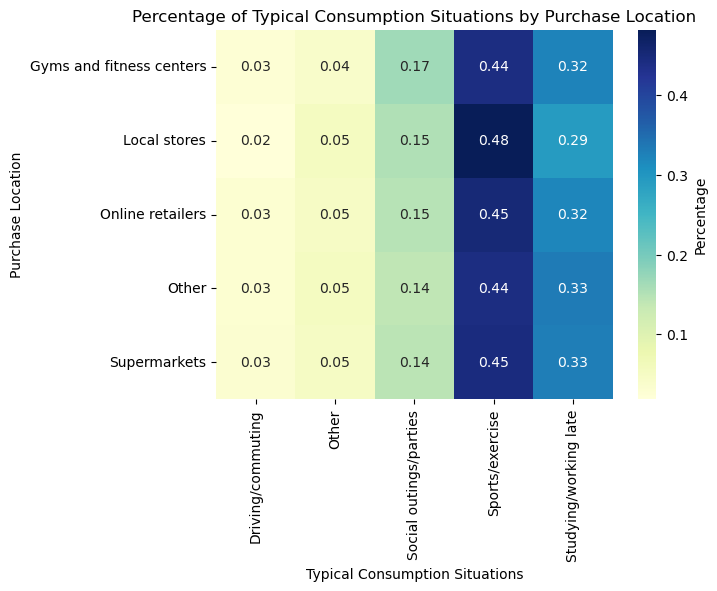

In [252]:
sns.heatmap(purchase_location_and_situations_percentage, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Percentage'})

plt.title('Percentage of Typical Consumption Situations by Purchase Location')
plt.xlabel('Typical Consumption Situations')
plt.ylabel('Purchase Location')

plt.show()

จากการ Visualize แสดงให้เห็นว่าวัตถุประสงค์ของการเลือกซื้อสินค้าที่มากที่สุดในทุกสถานที่คือ Sports/exercise	, Studying/working late, Social outings/parties, Other เเละ Driving/commuting ตามลำดับ โดยสถานที่ที่มีการซื้อสินค่ามากที่สุดในแต่ละสถานการณ์เป็นดังนี้  

In [253]:
purchase_location_and_situations_percentage_float = pd.crosstab(df['Purchase_location'], df['Typical_consumption_situations'], normalize='index').astype(float)

# หาคอลัมน์ที่มีค่าสูงที่สุดในแต่ละแถว
max_column_float = purchase_location_and_situations_percentage_float.idxmax(axis=1)

# เพิ่มคอลัมน์ 'Max_Typical_consumption_situations' เพื่อเก็บค่า Typical_consumption_situations ที่มีการซื้อสินค้ามากที่สุด
purchase_location_and_situations_percentage_float['Max_Typical_consumption_situations'] = max_column_float
# หาค่าที่มากที่สุดในแต่ละคอลัมน์
max_values = purchase_location_and_situations_percentage_float.drop(columns='Max_Typical_consumption_situations').max()

# หา Purchase_location ที่เกี่ยวข้องกับค่าที่มากที่สุดในแต่ละคอลัมน์
max_purchase_location = purchase_location_and_situations_percentage_float.drop(columns='Max_Typical_consumption_situations').idxmax()

max_purchase_location = pd.DataFrame({'Typical_consumption_situations': max_values.index, 'Max_Purchase_Location': max_purchase_location.values, 'Percentage': max_values.values})

max_purchase_location


,Typical_consumption_situations,Max_Purchase_Location,Percentage
0,Driving/commuting,Supermarkets,0.032265
1,Other,Other,0.054492
2,Social outings/parties,Gyms and fitness centers,0.166667
3,Sports/exercise,Local stores,0.482165
4,Studying/working late,Other,0.332842


#### สถานการณ์ที่ทำให้ซื้อสินค้าและส่วนประกอบที่คาดหวัง 

หาความสัมพันธ์ระหว่างสถานการณ์ที่ทำให้ซื้อสินค้าและส่วนประกอบที่คาดหวัง 

In [254]:
situations_and_expected_ingredients = df[['Typical_consumption_situations', 'Ingredients_expected']]
situations_and_expected_ingredients = pd.crosstab(situations_and_expected_ingredients['Typical_consumption_situations'], situations_and_expected_ingredients['Ingredients_expected'])
situations_and_expected_ingredients

Ingredients_expected,Caffeine,Guarana,Sugar,Vitamins
Typical_consumption_situations,,,,
Driving/commuting,108,50,63,76
Other,179,73,110,129
Social outings/parties,561,248,311,367
Sports/exercise,1761,724,870,1139
Studying/working late,1287,458,663,823


คิดจำนวนที่ได้ให้เป็น percentage

In [255]:
# สร้างตารางแสดงร้อยละของแต่ละ Ingredients_expected สำหรับแต่ละ Typical_consumption_situation
situations_and_expected_ingredients_percentage = df[['Typical_consumption_situations', 'Ingredients_expected']]
situations_and_expected_ingredients_percentage = pd.crosstab(situations_and_expected_ingredients_percentage['Typical_consumption_situations'], situations_and_expected_ingredients_percentage['Ingredients_expected'], normalize='index')
situations_and_expected_ingredients_percentage

Ingredients_expected,Caffeine,Guarana,Sugar,Vitamins
Typical_consumption_situations,,,,
Driving/commuting,0.363636,0.168350,0.212121,0.255892
Other,0.364562,0.148676,0.224033,0.262729
Social outings/parties,0.377270,0.166779,0.209146,0.246806
Sports/exercise,0.391856,0.161104,0.193591,0.253449
Studying/working late,0.398329,0.141752,0.205200,0.254720


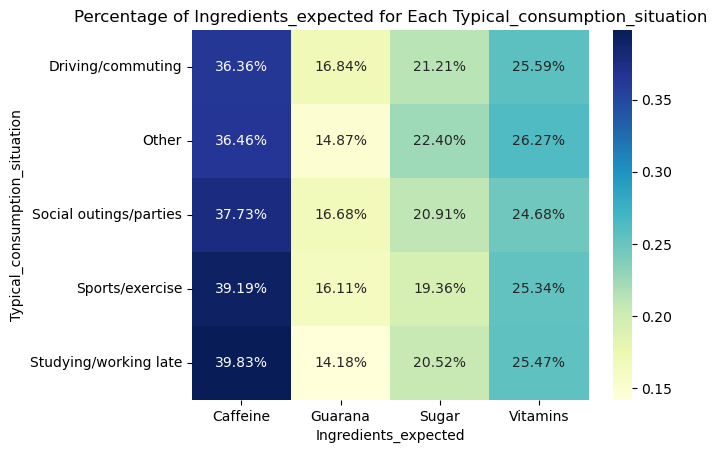

In [256]:
sns.heatmap(situations_and_expected_ingredients_percentage, annot=True, cmap="YlGnBu", fmt=".2%")

plt.title("Percentage of Ingredients_expected for Each Typical_consumption_situation")
plt.xlabel("Ingredients_expected")
plt.ylabel("Typical_consumption_situation")
plt.show()

จากการ Visualize แสดงให้เห็นว่าส่วนประกอบที่คาดหวังในสินค้าเป็นไปในทิศทางเดียวกันคือคาดหวังให้มี Caffeine, Vitamins, Sugar เเละ Guarana ตามลำดับ โดยสถานการณ์ที่คาดหวังแต่ละส่วนประกอบมากที่สุดเป็นดังนี้  

In [257]:
# สร้างตารางแสดงร้อยละของแต่ละ Ingredients_expected สำหรับแต่ละ Typical_consumption_situation
situations_and_expected_ingredients_percentage = df[['Typical_consumption_situations', 'Ingredients_expected']]
situations_and_expected_ingredients_percentage = pd.crosstab(situations_and_expected_ingredients_percentage['Typical_consumption_situations'], situations_and_expected_ingredients_percentage['Ingredients_expected'], normalize='index')

# หาค่าที่มากที่สุดในแต่ละคอลัมน์
max_values = situations_and_expected_ingredients_percentage.idxmax(axis=0)

max_ingredients_expected = pd.DataFrame({'Ingredients_expected': max_values.index, 'Typical_consumption_situations': max_values.values, 'Percentage': situations_and_expected_ingredients_percentage.max(axis=0).values})

max_ingredients_expected


,Ingredients_expected,Typical_consumption_situations,Percentage
0,Caffeine,Studying/working late,0.398329
1,Guarana,Driving/commuting,0.168350
2,Sugar,Other,0.224033
3,Vitamins,Other,0.262729


## 3. การจำแนกประสบการณ์รสชาติเครื่องดื่มของผู้บริโภค (Machine Learning)

เพื่อจำแนกว่าผู้บริโภคมีประสบการณ์ในเรื่องรสชาติของเครื่องดื่มอยู่ที่ระดับใด โดยมีการพิจารณาจากการคัดเลือกฟีเจอร์ที่สำคัญ

### แปลงข้อมูลให้อยู่ในรูปตัวเลขเพื่อใช้ในการทำ Machine Learning

In [258]:
#ทำการแปลงข้อมูลให้อยู่ในรูปตัวเลขเพื่อใช้ในการคำนวณทางสถิติ
df_taste_experience = df.drop(['Taste_experience','Name','City'], axis=1)
df_categories = df_taste_experience.select_dtypes(include=[object])
df_categories

x_label = df_categories.apply(LabelEncoder().fit_transform)
x_label

,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,...,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Age,Gender
0,1,3,0,1,1,3,0,4,1,0,...,0,2,4,1,2,1,4,4,0,0
1,0,2,2,0,1,3,0,2,0,0,...,1,1,3,1,0,1,4,3,1,1
2,4,1,3,1,0,3,0,0,3,0,...,1,2,4,4,2,2,0,2,1,0
3,0,3,0,0,2,3,0,0,3,1,...,1,0,0,3,2,0,3,3,1,1
4,4,0,0,0,1,3,0,1,0,0,...,0,2,0,3,1,0,4,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,4,1,1,3,0,0,3,1,...,0,0,3,1,2,0,4,4,2,1
9996,2,3,3,0,2,2,1,1,4,2,...,0,0,4,4,2,1,2,2,0,1
9997,2,0,0,1,2,1,0,3,1,0,...,1,0,2,1,0,0,3,3,2,1
9998,1,3,0,0,2,2,0,4,1,4,...,1,2,0,1,1,1,4,4,1,1


### Feature Importance (Random Forest)

ทำการหา Feature Importance โดยใช้วิธี Random Forest ซึ่งเป็นการเรียนรู้แบบ Ensemble เพื่อใช้ในการจำแนก Class 

### Train Test Split

In [259]:
# กำหนดข้อมูลที่ใช้ในการ train และ test
x = x_label
y = df['Taste_experience']

### Random Forest Model Creation

In [260]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# สร้าง GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid={'max_depth': [5], 'min_samples_split': [2], 'min_samples_leaf': [4]}, cv=10, scoring='accuracy')

# Fit โมเดล
grid_search.fit(x, y)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best Parameters:", grid_search.best_params_)

# ค่า accuracy ที่ดีที่สุด
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 0.2961


In [261]:
# ดึงค่าความสำคัญของฟีเจอร์
feature_importance = grid_search.best_estimator_.feature_importances_
# ดึงชื่อของฟีเจอร์จาก DataFrame
feature_names = x.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
8,Current_brands,0.064214
19,Typical_consumption_situations,0.060231
2,Consume_reason,0.059135
9,Reasons_for_choosing_brands,0.056466
20,Age,0.055045
18,Purchase_location,0.054065
10,Improvements_desired,0.052884
0,Consume_frequency,0.052243
15,Packaging_preference,0.049592
5,General_perception,0.048590


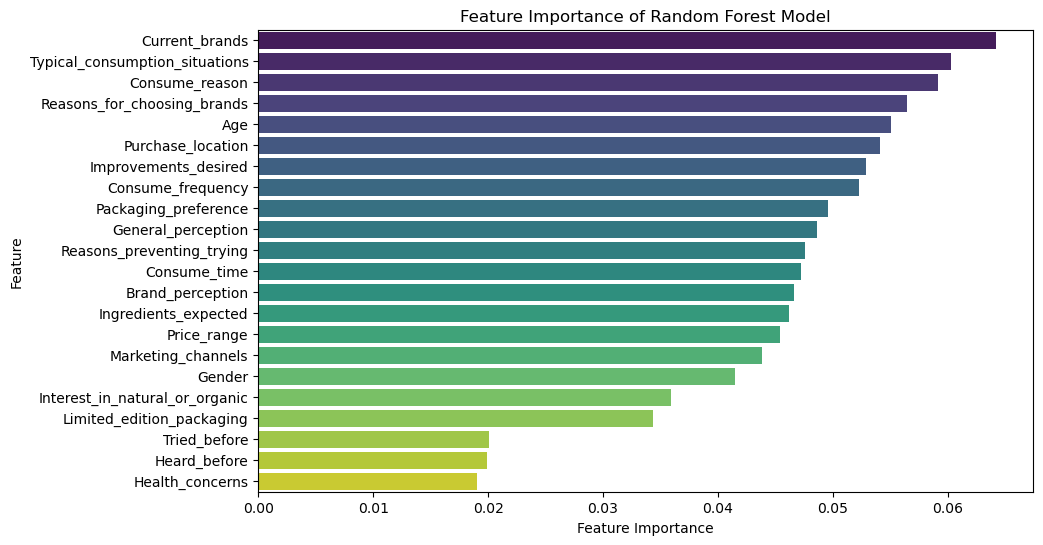

In [262]:
import matplotlib.pyplot as plt
# สร้างกราฟ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Model')
plt.show()


ทำการคัดเลือก Feature โดยกำหนด threshold = 0.05 ทำให้ได้ Feature ที่คัดเลือกมาดังนี้

In [263]:
feature_importance = feature_importance[feature_importance['Importance'] > 0.05]
new_x = x[feature_importance['Feature']]
new_x

,Current_brands,Typical_consumption_situations,Consume_reason,Reasons_for_choosing_brands,Age,Purchase_location,Improvements_desired,Consume_frequency
0,1,4,0,0,0,4,3,1
1,0,3,2,0,1,4,1,0
2,3,2,3,0,1,0,4,4
3,3,3,0,1,1,3,2,0
4,0,4,0,0,0,4,1,4
...,...,...,...,...,...,...,...,...
9995,3,4,4,1,2,4,2,2
9996,4,2,3,2,0,2,1,2
9997,1,3,0,0,2,3,2,2
9998,1,4,0,4,1,4,2,1


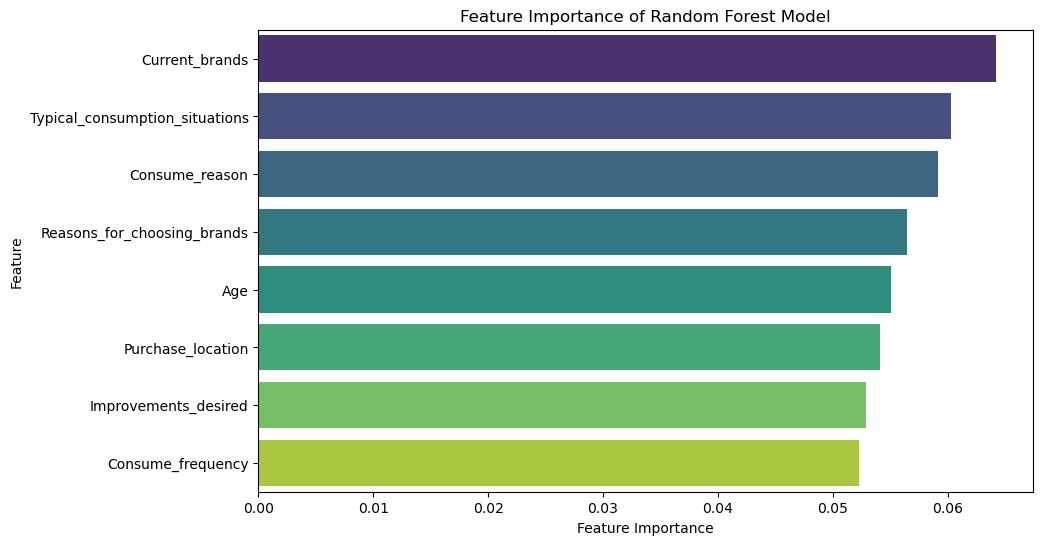

In [264]:
#กราฟ feature ที่ได้จากการคัดเลือก
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Model')
plt.show()

โดยจะนำ ฟีเจอร์ทั้ง 9 ตัวนี้ไปทำการประเมินประสิทธิภาพ Model ต่อไป

### การประเมินประสิทธิภาพโมเดล 

โดยในข้อมูลนี้เราจะทำการประเมินประสิทธิภาพโมเดลทั้งหมด 5 วิธีด้วยกันนั่นคือ

`1. DecisionTreeClassifier` 

`2. RandomForestClassifier` 

`3. GradientBoostingClassifier` 

`4. KNeighborsClassifier`

`5. LogisticRegression`

และทำการเปรียบเทียบประสิทธิภาพในแต่ละโมเดล

### DecisionTreeClassifier

#### Train Test Split

In [265]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Taste_experience']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [266]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# สร้าง Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

decision_acc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.21066666666666667


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [267]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.09      0.11      0.10       316
           2       0.16      0.18      0.16       457
           3       0.31      0.29      0.30       887
           4       0.24      0.23      0.23       744
           5       0.17      0.16      0.17       596

    accuracy                           0.21      3000
   macro avg       0.19      0.19      0.19      3000
weighted avg       0.22      0.21      0.21      3000



เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 21% ในการทำนายค่า Taste_experience ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล DecisionTreeClassifier ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`class 1`: precision = 0.09, recall = 0.11, f1-score = 0.10

`class 2`: precision = 0.16, recall = 0.18, f1-score = 0.16

`class 3`: precision = 0.31, recall = 0.29, f1-score = 0.30

`class 4`: precision = 0.24, recall = 0.23, f1-score = 0.23

`class 5`: precision = 0.17, recall = 0.16, f1-score = 0.17

เมื่อเปรียบเทียบพบว่า class 3 มีความสามารถในการจำแนกถูกต้องมากที่สุดโดยอิงจากค่า precision และ recall
แต่ถึงอย่างไรก็ตาม อาจต้องพิจารณาการปรับปรุงโมเดลเพื่อเพิ่มประสิทธิภาพในการทำนายในอนาคต

### RandomForestClassifier 

#### Train Test Split

In [268]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Taste_experience']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [269]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# สร้าง RandomForestClassifier โดยกำหนด class_weight เป็น 'balanced'
clf = RandomForestClassifier(class_weight='balanced', random_state=0)

# กำหนดค่าที่จะทำการ Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [20, None],
    'min_samples_split': [2],
    'min_samples_leaf': [2,5]
}

# สร้าง GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit โมเดล
grid_search.fit(x_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best Parameters:", grid_search.best_params_)

# ทำนายผลลัพธ์ของชุดข้อมูลทดสอบ
y_pred = grid_search.predict(x_test)

random_acc = accuracy_score(y_test, y_pred)

# ประเมินความแม่นยำ
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.2265


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [270]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.09      0.08      0.09       211
           2       0.18      0.19      0.18       305
           3       0.30      0.29      0.29       591
           4       0.25      0.27      0.26       496
           5       0.19      0.19      0.19       397

    accuracy                           0.23      2000
   macro avg       0.20      0.20      0.20      2000
weighted avg       0.22      0.23      0.23      2000



เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 23% ในการทำนายค่า Taste_experience ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล RandomForestClassifier ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`class 1`: precision = 0.09, recall = 0.08, f1-score = 0.09

`class 2`: precision = 0.18, recall = 0.19, f1-score = 0.18

`class 3`: precision = 0.30, recall = 0.29, f1-score = 0.29

`class 4`: precision = 0.25, recall = 0.27, f1-score = 0.26

`class 5`: precision = 0.19, recall = 0.19, f1-score = 0.19

เมื่อเปรียบเทียบพบว่า clas 1 มีการทำนายประสิทธิภาพที่ต่ำที่สุด เมื่อเทียบกับคลาสอื่นๆ

### GradientBoostingClassifier 

#### Train Test Split

In [271]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Taste_experience']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [272]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# กำหนดค่าที่จะทำการ GridSearch
learning_rate_list = [0.2]

# สร้าง GridSearchCV
param_grid = {'learning_rate': learning_rate_list}
grid_search = GridSearchCV(GradientBoostingClassifier(n_estimators=20, max_features=5, max_depth=2, random_state=0), param_grid, cv=10, scoring='accuracy')

#fit โมเดล
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# ทำการทดลองบนชุดข้อมูลทดสอบ
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)

gradient_acc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'learning_rate': 0.2}
Accuracy: 0.2955


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [273]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       211
           2       0.00      0.00      0.00       305
           3       0.29      0.97      0.45       591
           4       0.32      0.04      0.07       496
           5       0.00      0.00      0.00       397

    accuracy                           0.30      2000
   macro avg       0.12      0.20      0.10      2000
weighted avg       0.17      0.30      0.15      2000



c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 30% ในการทำนายค่า Taste_experience ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล GradientBoostingClassifier ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`class 1`: precision = 0.00, recall = 0.00, f1-score = 0.00

`class 2`: precision = 0.00, recall = 0.00, f1-score = 0.00

`class 3`: precision = 0.29, recall = 0.97, f1-score = 0.45

`class 4`: precision = 0.32, recall = 0.04, f1-score = 0.07

`class 5`: precision = 0.00, recall = 0.00, f1-score = 0.00

เมื่อเปรียบเทียบพบว่า class 3 มีความสามารถในการจำแนกถูกต้องมากที่สุดโดยอิงจากค่า precision และ recall
แต่ถึงอย่างไรก็ตาม อาจต้องพิจารณาการปรับปรุงโมเดลเพื่อเพิ่มประสิทธิภาพในการทำนายในอนาคต

### KNeighborsClassifier 

#### Train Test Split

In [274]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Taste_experience']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [275]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# กำหนดพารามิเตอร์ที่ใช้ในการค้นหา
param_grid = {'n_neighbors': [11,50]}
# สร้าง GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
#fit โมเดล
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# ทำการทดลองบนชุดข้อมูลทดสอบ
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)

knn_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'n_neighbors': 50}
Accuracy: 0.2725


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [276]:
from sklearn.metrics import classification_report
y_pred = best_knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       211
           2       0.27      0.05      0.09       305
           3       0.30      0.63      0.40       591
           4       0.24      0.26      0.25       496
           5       0.19      0.07      0.10       397

    accuracy                           0.27      2000
   macro avg       0.20      0.20      0.17      2000
weighted avg       0.23      0.27      0.21      2000



เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 27% ในการทำนายค่า Taste_experience ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล KNN ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`class 1`: precision = 0.00, recall = 0.00, f1-score = 0.00

`class 2`: precision = 0.27, recall = 0.05, f1-score = 0.09

`class 3`: precision = 0.30, recall = 0.63, f1-score = 0.40

`class 4`: precision = 0.24, recall = 0.26, f1-score = 0.25

`class 5`: precision = 0.19, recall = 0.07, f1-score = 0.10

เมื่อเปรียบเทียบพบว่า class 3 มีความสามารถในการจำแนกถูกต้องมากที่สุดโดยอิงจากค่า precision, recall และ f1-score
แต่ถึงอย่างไรก็ตาม อาจต้องพิจารณาการปรับปรุงโมเดลเพื่อเพิ่มประสิทธิภาพในการทำนายในอนาคต

### LogisticRegression

#### Train Test Split

In [277]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Taste_experience']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(random_state=0)
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.2965


In [279]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Taste_experience']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

# สร้างโมเดล Logistic Regression โดยกำหนด class_weight เป็น 'balanced'
logistic = LogisticRegression(class_weight='balanced', random_state=0)

# Fit โมเดลกับข้อมูล
logistic.fit(x_train, y_train)

# ทำนายผลลัพธ์บนชุดข้อมูลทดสอบ
y_pred = logistic.predict(x_test)

# คำนวณความแม่นยำ
accuracy = accuracy_score(y_test, y_pred)
logistic_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.1835


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [280]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.09      0.22      0.13       211
           2       0.16      0.25      0.19       305
           3       0.26      0.15      0.19       591
           4       0.27      0.20      0.23       496
           5       0.18      0.15      0.16       397

    accuracy                           0.18      2000
   macro avg       0.19      0.19      0.18      2000
weighted avg       0.21      0.18      0.19      2000



เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 18% ในการทำนายค่า Taste_experience ของชุดข้อมูลทดสอบทั้งหมด ซึ่งมีค่าความแม่นยำที่ต่ำ

สำหรับการวัดประสิทธิภาพของโมเดล LogisticRegression ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`class 1`: precision = 0.09, recall = 0.22, f1-score = 0.13

`class 2`: precision = 0.16, recall = 0.25, f1-score = 0.19

`class 3`: precision = 0.26, recall = 0.15, f1-score = 0.19

`class 4`: precision = 0.27, recall = 0.20, f1-score =  0.23

`class 5`: precision = 0.18, recall = 0.15, f1-score = 0.16

เมื่อเปรียบเทียบพบว่า class 4 มีความสามารถในการจำแนกถูกต้องมากที่สุดโดยอิงจากค่า precision, recall และ f1-score
แต่ถึงอย่างไรก็ตาม อาจต้องพิจารณาการปรับปรุงโมเดลเพื่อเพิ่มประสิทธิภาพในการทำนายในอนาคต

### สรุปผลโดยรวมจาก Model ทั้ง 5 แบบ

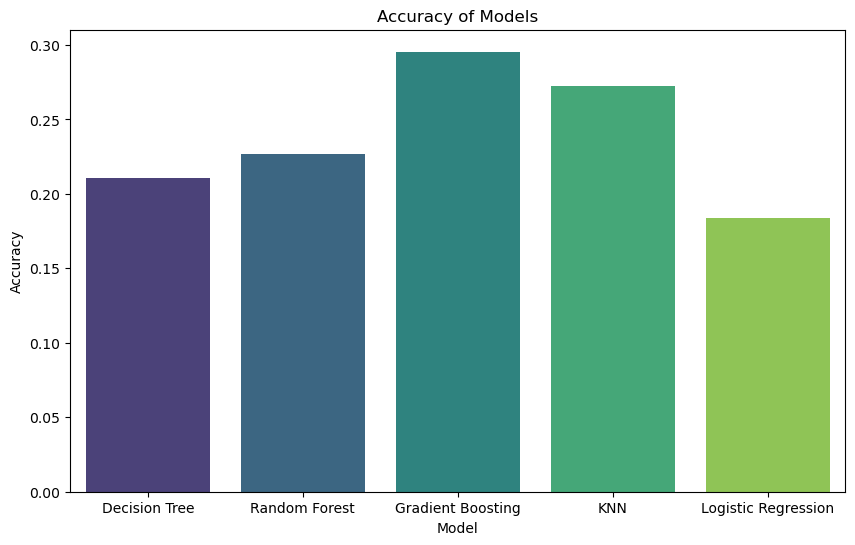

In [281]:
#plot all accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=['Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Logistic Regression'], y=[decision_acc, random_acc, gradient_acc, knn_acc, logistic_acc], palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

In [282]:
print('ค่า Accuracy ของแต่ละโมเดล')
print('Decision Tree:', decision_acc)
print('Random Forest:', random_acc)
print('Gradient Boosting:', gradient_acc)
print('KNN:', knn_acc)
print('Logistic Regression:', logistic_acc)

ค่า Accuracy ของแต่ละโมเดล
Decision Tree: 0.21066666666666667
Random Forest: 0.2265
Gradient Boosting: 0.2955
KNN: 0.2725
Logistic Regression: 0.1835


จากผลการทดสอบวัดประสิทธิภาพของ Model พบว่า Gradient Boosting Model มีค่า Accuracy สูงที่สุด และ Logistic Regression มีค่า Accuracy ต่ำที่สุด

จะเห็นได้ว่าจากการทดสอบค่า Accuracy ยังไม่มีความแม่นยำมากพอ โดยอาจเกิดจาก Feature ที่เลือกไม่ได้มีความสำคัญมากพอและการ Imbalanced ของข้อมูล

## 4. การจำแนกช่องทางการตลาดที่ลูกค้าได้รับ (Machine Learning)

เพื่อจำแนกว่าผู้บริโภคได้รับช่องทางการตลาดว่ามาจากช่องทางไหนโดยมีการพิจารณาจากการคัดเลือกฟีเจอร์ที่สำคัญ

### แปลงข้อมูลให้อยู่ในรูปตัวเลขเพื่อใช้ในการทำ Machine Learning

In [283]:
#ทำการแปลงข้อมูลให้อยู่ในรูปตัวเลขเพื่อใช้ในการคำนวณทางสถิติ
df_taste_experience = df.drop(['Marketing_channels','Name'], axis=1)
df_categories = df_taste_experience.select_dtypes(include=[object])
df_categories

x_label = df_categories.apply(LabelEncoder().fit_transform)
x_label

,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,...,Health_concerns,Interest_in_natural_or_organic,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Age,Gender,City
0,1,3,0,1,1,3,0,4,1,0,...,0,2,1,2,1,4,4,0,0,0
1,0,2,2,0,1,3,0,2,0,0,...,1,1,1,0,1,4,3,1,1,9
2,4,1,3,1,0,3,0,0,3,0,...,1,2,4,2,2,0,2,1,0,9
3,0,3,0,0,2,3,0,0,3,1,...,1,0,3,2,0,3,3,1,1,8
4,4,0,0,0,1,3,0,1,0,0,...,0,2,3,1,0,4,4,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,4,1,1,3,0,0,3,1,...,0,0,1,2,0,4,4,2,1,8
9996,2,3,3,0,2,2,1,1,4,2,...,0,0,4,2,1,2,2,0,1,1
9997,2,0,0,1,2,1,0,3,1,0,...,1,0,1,0,0,3,3,2,1,2
9998,1,3,0,0,2,2,0,4,1,4,...,1,2,1,1,1,4,4,1,1,1


### Feature Importance (Random Forest)

ทำการหา Feature Importance โดยใช้วิธี Random Forest ซึ่งเป็นการเรียนรู้แบบ Ensemble เพื่อใช้ในการจำแนก Class 

### Train Test Split

In [284]:
# กำหนดข้อมูลที่ใช้ในการ train และ test
x = x_label
y = df['Marketing_channels']

### Random Forest Model Creation

In [285]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# สร้าง GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid={'max_depth': [5], 'min_samples_split': [2], 'min_samples_leaf': [4]}, cv=10, scoring='accuracy')

# Fit โมเดล
grid_search.fit(x, y)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best Parameters:", grid_search.best_params_)

# ค่า accuracy ที่ดีที่สุด
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 0.4404


In [286]:
# ดึงค่าความสำคัญของฟีเจอร์
feature_importance = grid_search.best_estimator_.feature_importances_
# ดึงชื่อของฟีเจอร์จาก DataFrame
feature_names = x.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
19,Age,0.314906
21,City,0.260182
6,Tried_before,0.088195
20,Gender,0.086177
5,General_perception,0.048497
16,Price_range,0.027946
2,Consume_reason,0.018071
17,Purchase_location,0.015603
9,Reasons_for_choosing_brands,0.015560
0,Consume_frequency,0.014991


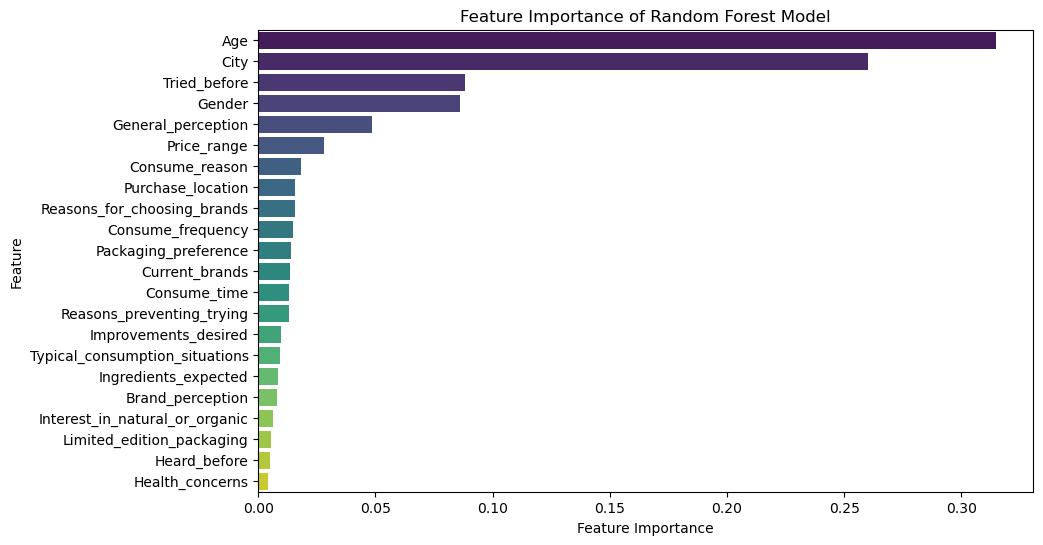

In [287]:
import matplotlib.pyplot as plt
# สร้างกราฟ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Model')
plt.show()


ทำการคัดเลือก Feature โดยกำหนด threshold = 0.05 ทำให้ได้ Feature ที่คัดเลือกมาดังนี้

In [288]:
feature_importance = feature_importance[feature_importance['Importance'] > 0.05]
new_x = x[feature_importance['Feature']]
new_x

,Age,City,Tried_before,Gender
0,0,0,0,0
1,1,9,0,1
2,1,9,0,0
3,1,8,0,1
4,0,4,0,1
...,...,...,...,...
9995,2,8,0,1
9996,0,1,1,1
9997,2,2,0,1
9998,1,1,0,1


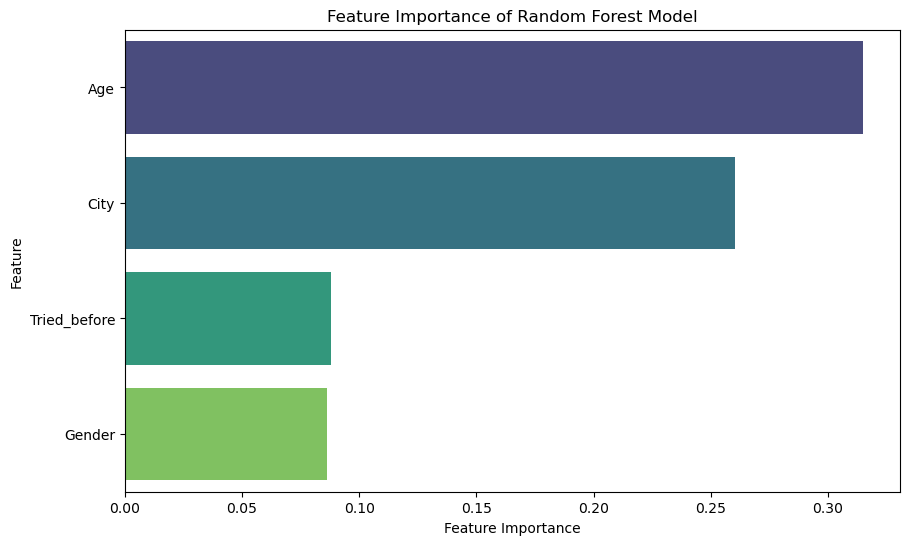

In [289]:
#กราฟ feature ที่ได้จากการคัดเลือก
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Model')
plt.show()

โดยจะนำ ฟีเจอร์ทั้ง 4 ตัวนี้ไปทำการประเมินประสิทธิภาพ Model ต่อไป

### การประเมินประสิทธิภาพโมเดล 

โดยในข้อมูลนี้เราจะทำการประเมินประสิทธิภาพโมเดลทั้งหมด 5 วิธีด้วยกันนั่นคือ

`1. DecisionTreeClassifier` 

`2. RandomForestClassifier` 

`3. GradientBoostingClassifier` 

`4. KNeighborsClassifier`

`5. LogisticRegression`

และทำการเปรียบเทียบประสิทธิภาพในแต่ละโมเดล

### DecisionTreeClassifier

#### Train Test Split

In [290]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Marketing_channels']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [291]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# สร้าง Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
decision_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4613333333333333


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [292]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

        Online ads       0.54      0.67      0.60      1206
             Other       0.32      0.17      0.22       368
Outdoor billboards       0.26      0.18      0.21       368
       Print media       0.18      0.02      0.03       252
    TV commercials       0.42      0.56      0.48       806

          accuracy                           0.46      3000
         macro avg       0.35      0.32      0.31      3000
      weighted avg       0.42      0.46      0.43      3000



เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 46% ในการทำนายค่า Marketing_channels ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล DecisionTreeClassifier ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`Online ads`: โมเดลมีความแม่นยำในการทำนายแบบ Online ads ประมาณ 54% โดยมี Recall ประมาณ 67% และค่า F1-score ประมาณ 60%

`Other`: โมเดลมีความแม่นยำในการทำนายแบบ Other ประมาณ 32% โดยมี Recall ประมาณ 17% และค่า F1-score ประมาณ 22%

`Outdoor billboards`: โมเดลมีความแม่นยำในการทำนายแบบ Outdoor billboards ประมาณ 26% โดยมี Recall ประมาณ 18% และค่า F1-score ประมาณ 21%

`Print media`: โมเดลมีความแม่นยำในการทำนายแบบ Print media ประมาณ 18% โดยมี Recall ประมาณ 2% และค่า F1-score ประมาณ 3%

`TV commercials`: โมเดลมีความแม่นยำในการทำนายแบบ TV commercials ประมาณ 42% โดยมี Recall ประมาณ 56% และค่า F1-score ประมาณ 48%

โดยสรุปโมเดลมีความแม่นยำในการทำนายแบบ Online ads และ TV commercials สูงกว่าแบบอื่น ๆ ซึ่งสามารถใช้ในการวิเคราะห์และวางแผนกลยุทธ์การตลาดได้ดีกว่า

### RandomForestClassifier 

#### Train Test Split

In [293]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Marketing_channels']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [294]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# สร้าง RandomForestClassifier โดยกำหนด class_weight เป็น 'balanced'
clf = RandomForestClassifier(class_weight='balanced', random_state=0)

# กำหนดค่าที่จะทำการ Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [20, None],
    'min_samples_split': [2],
    'min_samples_leaf': [2,5]
}

# สร้าง GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit โมเดล
grid_search.fit(x_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best Parameters:", grid_search.best_params_)

# ทำนายผลลัพธ์ของชุดข้อมูลทดสอบ
y_pred = grid_search.predict(x_test)
random_acc = accuracy_score(y_test, y_pred)
# ประเมินความแม่นยำ
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.413


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [295]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

        Online ads       0.59      0.45      0.51       804
             Other       0.24      0.27      0.25       245
Outdoor billboards       0.27      0.29      0.28       245
       Print media       0.12      0.11      0.12       168
    TV commercials       0.45      0.58      0.51       538

          accuracy                           0.41      2000
         macro avg       0.33      0.34      0.33      2000
      weighted avg       0.43      0.41      0.42      2000



เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 41% ในการทำนายค่า Marketing_channels ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล RandomForestClassifier ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`Online ads`: โมเดลมีความแม่นยำในการทำนายแบบ Online ads ประมาณ 59% โดยมี Recall ประมาณ 45% และค่า F1-score ประมาณ 51%

`Other`: โมเดลมีความแม่นยำในการทำนายแบบ Other ประมาณ 24% โดยมี Recall ประมาณ 27% และค่า F1-score ประมาณ 25%

`Outdoor billboards`: โมเดลมีความแม่นยำในการทำนายแบบ Outdoor billboards ประมาณ 27% โดยมี Recall ประมาณ 29% และค่า F1-score ประมาณ 28%

`Print media`: โมเดลมีความแม่นยำในการทำนายแบบ Print media ประมาณ 12% โดยมี Recall ประมาณ 11% และค่า F1-score ประมาณ 12%

`TV commercials`: โมเดลมีความแม่นยำในการทำนายแบบ TV commercials ประมาณ 45% โดยมี Recall ประมาณ 58% และค่า F1-score ประมาณ 51%

โดยสรุปโมเดลมีความแม่นยำในการทำนายแบบ Online ads และ TV commercials สูงกว่าแบบอื่น ๆ ซึ่งสามารถใช้ในการวิเคราะห์และวางแผนกลยุทธ์การตลาดได้ดีกว่า

### GradientBoostingClassifier 

#### Train Test Split

In [296]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Marketing_channels']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [297]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# กำหนดค่าที่จะทำการ GridSearch
learning_rate_list = [0.2, 0.5, 0.8, 1.0]

# สร้าง GridSearchCV
param_grid = {'learning_rate': learning_rate_list}
grid_search = GridSearchCV(GradientBoostingClassifier(n_estimators=20, max_features=5, max_depth=2, random_state=0), param_grid, cv=10, scoring='accuracy')

#fit โมเดล
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# ทำการทดลองบนชุดข้อมูลทดสอบ
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)
gradient_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'learning_rate': 0.5}
Accuracy: 0.478


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [298]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

        Online ads       0.55      0.70      0.62       804
             Other       0.39      0.20      0.27       245
Outdoor billboards       0.28      0.23      0.25       245
       Print media       0.00      0.00      0.00       168
    TV commercials       0.44      0.53      0.49       538

          accuracy                           0.48      2000
         macro avg       0.33      0.33      0.32      2000
      weighted avg       0.42      0.48      0.44      2000



เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 48% ในการทำนายค่า Marketing_channels ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล GradientBoostingClassifier ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`Online ads`: โมเดลมีความแม่นยำในการทำนายแบบ Online ads ประมาณ 55% โดยมี Recall ประมาณ 70% และค่า F1-score ประมาณ 62%

`Other`: โมเดลมีความแม่นยำในการทำนายแบบ Other ประมาณ 39% โดยมี Recall ประมาณ 20% และค่า F1-score ประมาณ 27%

`Outdoor billboards`: โมเดลมีความแม่นยำในการทำนายแบบ Outdoor billboards ประมาณ 28% โดยมี Recall ประมาณ 23% และค่า F1-score ประมาณ 25%

`Print media`: โมเดลมีความแม่นยำในการทำนายแบบ Print media ประมาณ 0% โดยมี Recall ประมาณ 0% และค่า F1-score ประมาณ 0%

`TV commercials`: โมเดลมีความแม่นยำในการทำนายแบบ TV commercials ประมาณ 44% โดยมี Recall ประมาณ 43% และค่า F1-score ประมาณ 49%

โดยสรุปโมเดลมีความแม่นยำในการทำนายแบบ Online ads แสูงกว่าแบบอื่น ๆ ซึ่งสามารถใช้ในการวิเคราะห์และวางแผนกลยุทธ์การตลาดได้ดีกว่า ในขณะที่ Print media ไม่มีความแม่นยำในการทำนายเลย

### KNeighborsClassifier 

#### Train Test Split

In [299]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Marketing_channels']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [300]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# กำหนดพารามิเตอร์ที่ใช้ในการค้นหา
param_grid = {'n_neighbors': [11,100]}
# สร้าง GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
#fit โมเดล
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# ทำการทดลองบนชุดข้อมูลทดสอบ
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)
knn_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'n_neighbors': 100}
Accuracy: 0.46


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [301]:
from sklearn.metrics import classification_report
y_pred = best_knn.predict(x_test)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

        Online ads       0.53      0.65      0.59       803
             Other       0.29      0.17      0.22       235
Outdoor billboards       0.29      0.14      0.19       249
       Print media       0.00      0.00      0.00       153
    TV commercials       0.43      0.57      0.49       560

          accuracy                           0.46      2000
         macro avg       0.31      0.31      0.30      2000
      weighted avg       0.40      0.46      0.42      2000



c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 46% ในการทำนายค่า Marketing_channels ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล KNN ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`Online ads`: โมเดลมีความแม่นยำในการทำนายแบบ Online ads ประมาณ 53% โดยมี Recall ประมาณ 65% และค่า F1-score ประมาณ 59%

`Other`: โมเดลมีความแม่นยำในการทำนายแบบ Other ประมาณ 29% โดยมี Recall ประมาณ 17% และค่า F1-score ประมาณ 22%

`Outdoor billboards`: โมเดลมีความแม่นยำในการทำนายแบบ Outdoor billboards ประมาณ 29% โดยมี Recall ประมาณ 14% และค่า F1-score ประมาณ 19%

`Print media`: โมเดลมีความแม่นยำในการทำนายแบบ Print media ประมาณ 0% โดยมี Recall ประมาณ 0% และค่า F1-score ประมาณ 0%

`TV commercials`: โมเดลมีความแม่นยำในการทำนายแบบ TV commercials ประมาณ 43% โดยมี Recall ประมาณ 57% และค่า F1-score ประมาณ 49%

โดยสรุปโมเดลมีความแม่นยำในการทำนายแบบ Online ads แสูงกว่าแบบอื่น ๆ ซึ่งสามารถใช้ในการวิเคราะห์และวางแผนกลยุทธ์การตลาดได้ดีกว่า ในขณะที่ Print media ไม่มีความแม่นยำในการทำนายเลย

### LogisticRegression

#### Train Test Split

In [302]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Marketing_channels']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [303]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# สร้างโมเดล Logistic Regression
logistic = LogisticRegression(random_state=0)

# ทำการ fit โมเดล
logistic.fit(x_train, y_train)

# ทำการทดลองบนชุดข้อมูลทดสอบ
y_pred = logistic.predict(x_test)

# ประเมินความแม่นยำ
accuracy = accuracy_score(y_test, y_pred)
logistic_acc = accuracy
print("Accuracy:", accuracy)


Accuracy: 0.4335


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [304]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

        Online ads       0.44      0.83      0.58       803
             Other       0.25      0.06      0.10       235
Outdoor billboards       0.14      0.01      0.02       249
       Print media       0.00      0.00      0.00       153
    TV commercials       0.43      0.33      0.37       560

          accuracy                           0.43      2000
         macro avg       0.25      0.25      0.21      2000
      weighted avg       0.35      0.43      0.35      2000



c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 43% ในการทำนายค่า Marketing_channels ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล Logistic ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`Online ads`: โมเดลมีความแม่นยำในการทำนายแบบ Online ads ประมาณ 44% โดยมี Recall ประมาณ 83% และค่า F1-score ประมาณ 58%

`Other`: โมเดลมีความแม่นยำในการทำนายแบบ Other ประมาณ 25% โดยมี Recall ประมาณ 6% และค่า F1-score ประมาณ 10%

`Outdoor billboards`: โมเดลมีความแม่นยำในการทำนายแบบ Outdoor billboards ประมาณ 14% โดยมี Recall ประมาณ 1% และค่า F1-score ประมาณ 2%

`Print media`: โมเดลมีความแม่นยำในการทำนายแบบ Print media ประมาณ 0% โดยมี Recall ประมาณ 0% และค่า F1-score ประมาณ 0%

`TV commercials`: โมเดลมีความแม่นยำในการทำนายแบบ TV commercials ประมาณ 43% โดยมี Recall ประมาณ 33% และค่า F1-score ประมาณ 37%

โดยสรุปโมเดลมีความแม่นยำในการทำนายแบบ Online ads แสูงกว่าแบบอื่น ๆ ซึ่งสามารถใช้ในการวิเคราะห์และวางแผนกลยุทธ์การตลาดได้ดีกว่า ในขณะที่ Print media ไม่มีความแม่นยำในการทำนายเลย

### สรุปผลโดยรวมจาก Model ทั้ง 5 แบบ

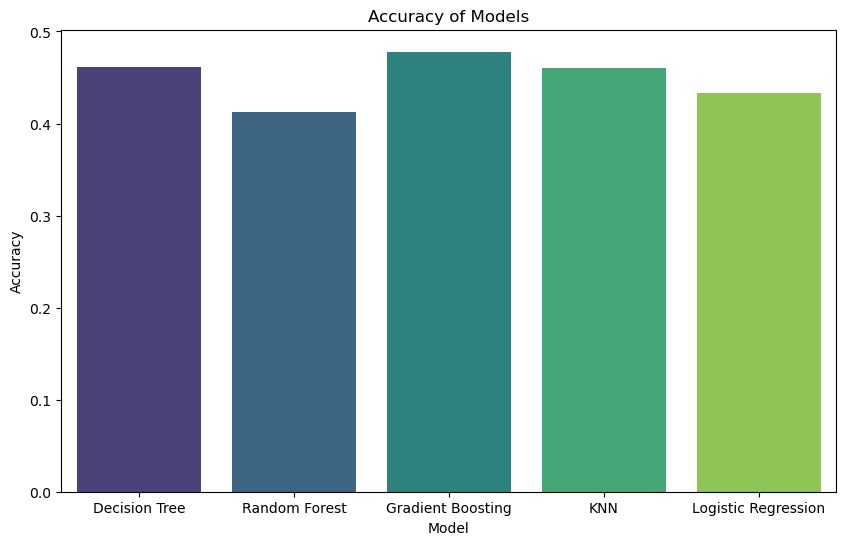

In [305]:
#plot all accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=['Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Logistic Regression'], y=[decision_acc, random_acc, gradient_acc, knn_acc, logistic_acc], palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

In [306]:
print('ค่า Accuracy ของแต่ละโมเดล')
print('Decision Tree:', decision_acc)
print('Random Forest:', random_acc)
print('Gradient Boosting:', gradient_acc)
print('KNN:', knn_acc)
print('Logistic Regression:', logistic_acc)

ค่า Accuracy ของแต่ละโมเดล
Decision Tree: 0.4613333333333333
Random Forest: 0.413
Gradient Boosting: 0.478
KNN: 0.46
Logistic Regression: 0.4335


จากผลการทดสอบวัดประสิทธิภาพของ Model มีความใกล้เคียงกันแต่พบว่า Gradient Boosting Model มีค่า Accuracy สูงที่สุด และ Random Forest มีค่า Accuracy ต่ำที่สุด

จะเห็นได้ว่าจากการทดสอบค่า Accuracy ยังไม่มีความแม่นยำมากพอแต่มากกว่า Insight (3.) โดยอาจเกิดจากการ Imbalanced ของข้อมูล

## 5. การจำแนกแบรนด์เครื่องดื่ม (Machine Learning)

เพื่อจำแนกแบรนด์เครื่องดื่มว่าเป็นแบรนด์อะไรโดยมีการพิจารณาจากการคัดเลือกฟีเจอร์ที่สำคัญ

### แปลงข้อมูลให้อยู่ในรูปตัวเลขเพื่อใช้ในการทำ Machine Learning

In [307]:
#ทำการแปลงข้อมูลให้อยู่ในรูปตัวเลขเพื่อใช้ในการคำนวณทางสถิติ
df_taste_experience = df.drop(['Current_brands','Name'], axis=1)
df_categories = df_taste_experience.select_dtypes(include=[object])
df_categories

x_label = df_categories.apply(LabelEncoder().fit_transform)
x_label

,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Reasons_preventing_trying,Reasons_for_choosing_brands,Improvements_desired,...,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Age,Gender,City
0,1,3,0,1,1,3,0,4,0,3,...,2,4,1,2,1,4,4,0,0,0
1,0,2,2,0,1,3,0,2,0,1,...,1,3,1,0,1,4,3,1,1,9
2,4,1,3,1,0,3,0,0,0,4,...,2,4,4,2,2,0,2,1,0,9
3,0,3,0,0,2,3,0,0,1,2,...,0,0,3,2,0,3,3,1,1,8
4,4,0,0,0,1,3,0,1,0,1,...,2,0,3,1,0,4,4,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,4,1,1,3,0,0,1,2,...,0,3,1,2,0,4,4,2,1,8
9996,2,3,3,0,2,2,1,1,2,1,...,0,4,4,2,1,2,2,0,1,1
9997,2,0,0,1,2,1,0,3,0,2,...,0,2,1,0,0,3,3,2,1,2
9998,1,3,0,0,2,2,0,4,4,2,...,2,0,1,1,1,4,4,1,1,1


### Feature Importance (Random Forest)

ทำการหา Feature Importance โดยใช้วิธี Random Forest ซึ่งเป็นการเรียนรู้แบบ Ensemble เพื่อใช้ในการจำแนก Class 

### Train Test Split

In [308]:
# กำหนดข้อมูลที่ใช้ในการ train และ test
x = x_label
y = df['Current_brands']

### Random Forest Model Creation

In [309]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# สร้าง GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid={'max_depth': [5], 'min_samples_split': [2], 'min_samples_leaf': [4]}, cv=10, scoring='accuracy')

# Fit โมเดล
grid_search.fit(x, y)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best Parameters:", grid_search.best_params_)

# ค่า accuracy ที่ดีที่สุด
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 0.2592


In [310]:
# ดึงค่าความสำคัญของฟีเจอร์
feature_importance = grid_search.best_estimator_.feature_importances_
# ดึงชื่อของฟีเจอร์จาก DataFrame
feature_names = x.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
19,Age,0.102408
21,City,0.096546
2,Consume_reason,0.062206
7,Reasons_preventing_trying,0.052609
14,Packaging_preference,0.052385
20,Gender,0.051924
8,Reasons_for_choosing_brands,0.050362
0,Consume_frequency,0.049996
18,Typical_consumption_situations,0.046839
9,Improvements_desired,0.045167


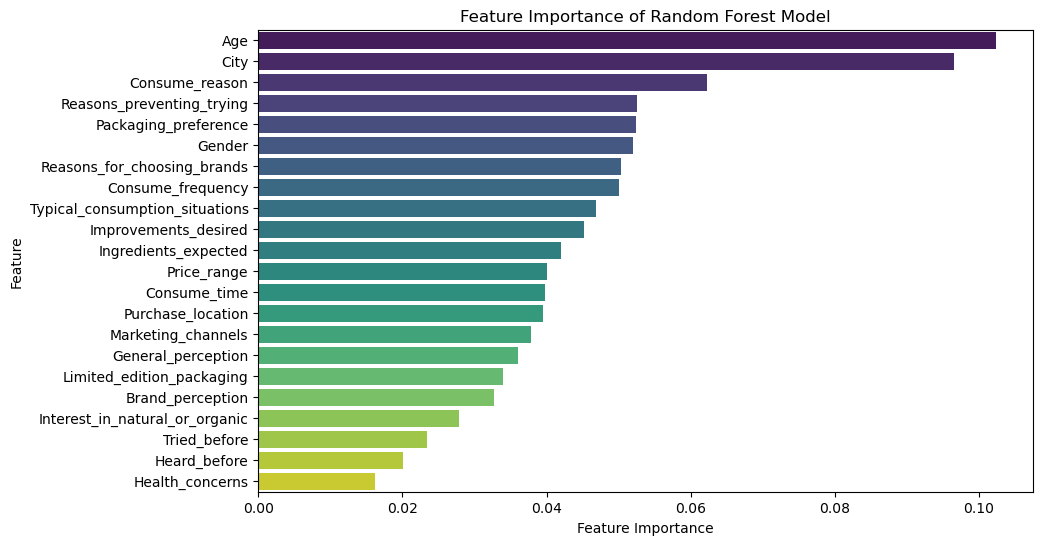

In [311]:
import matplotlib.pyplot as plt
# สร้างกราฟ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Model')
plt.show()


ทำการคัดเลือก Feature โดยกำหนด threshold = 0.05 ทำให้ได้ Feature ที่คัดเลือกมาดังนี้

In [312]:
feature_importance = feature_importance[feature_importance['Importance'] > 0.05]
new_x = x[feature_importance['Feature']]
new_x

,Age,City,Consume_reason,Reasons_preventing_trying,Packaging_preference,Gender,Reasons_for_choosing_brands
0,0,0,0,4,1,0,0
1,1,9,2,2,1,1,0
2,1,9,3,0,4,0,0
3,1,8,0,0,3,1,1
4,0,4,0,1,3,1,0
...,...,...,...,...,...,...,...
9995,2,8,4,0,1,1,1
9996,0,1,3,1,4,1,2
9997,2,2,0,3,1,1,0
9998,1,1,0,4,1,1,4


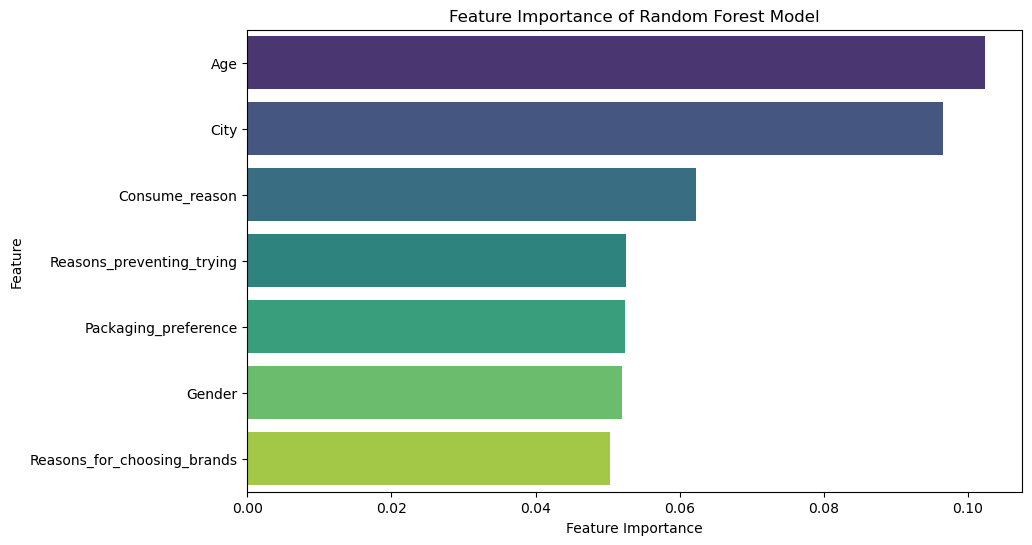

In [313]:
#กราฟ feature ที่ได้จากการคัดเลือก
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Model')
plt.show()

โดยจะนำ ฟีเจอร์ทั้ง 9 ตัวนี้ไปทำการประเมินประสิทธิภาพ Model ต่อไป

### การประเมินประสิทธิภาพโมเดล 

โดยในข้อมูลนี้เราจะทำการประเมินประสิทธิภาพโมเดลทั้งหมด 5 วิธีด้วยกันนั่นคือ

`1. DecisionTreeClassifier` 

`2. RandomForestClassifier` 

`3. GradientBoostingClassifier` 

`4. KNeighborsClassifier`

`5. LogisticRegression`

และทำการเปรียบเทียบประสิทธิภาพในแต่ละโมเดล

### DecisionTreeClassifier

#### Train Test Split

In [314]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Current_brands']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [315]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# สร้าง Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

decision_acc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.19233333333333333


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [316]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bepsi       0.24      0.30      0.27       634
   Blue Bull       0.12      0.12      0.12       317
       CodeX       0.07      0.07      0.07       294
   Cola-Coka       0.27      0.26      0.27       761
    Gangster       0.21      0.18      0.19       556
      Others       0.06      0.05      0.05       144
       Sky 9       0.07      0.05      0.06       294

    accuracy                           0.19      3000
   macro avg       0.15      0.15      0.15      3000
weighted avg       0.19      0.19      0.19      3000



เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 19% ในการทำนายค่า Current_Brand ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล DecisionTreeClassifier ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`Bepsi`: precision =  0.24, recall = 0.30, f1-score = 0.27

`Blue Bull`: precision = 0.12, recall = 0.12, f1-score = 0.12

`CodeX`: precision = 0.07, recall = 0.07, f1-score = 0.07

`Cola-Coka`: precision =  0.27, recall = 0.26, f1-score = 0.27

`Gangster`: precision = 0.21, recall = 0.18, f1-score = 0.19

`Others`: precision = 0.06, recall = 0.05, f1-score = 0.05

`Sky 9`: precision = 0.07, recall = 0.05, f1-score = 0.06 

เมื่อเปรียบเทียบพบว่า Cola-Coka และ Bepsi มีความสามารถในการจำแนกถูกต้องมากที่สุดโดยอิงจากค่า precision และ recall
แต่ถึงอย่างไรก็ตาม อาจต้องพิจารณาการปรับปรุงโมเดลเพื่อเพิ่มประสิทธิภาพในการทำนายในอนาคต

### RandomForestClassifier 

#### Train Test Split

In [317]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Current_brands']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [318]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# สร้าง RandomForestClassifier โดยกำหนด class_weight เป็น 'balanced'
clf = RandomForestClassifier(class_weight='balanced', random_state=0)

# กำหนดค่าที่จะทำการ Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [20, None],
    'min_samples_split': [2],
    'min_samples_leaf': [2,5]
}

# สร้าง GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit โมเดล
grid_search.fit(x_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best Parameters:", grid_search.best_params_)

# ทำนายผลลัพธ์ของชุดข้อมูลทดสอบ
y_pred = grid_search.predict(x_test)

random_acc = accuracy_score(y_test, y_pred)

# ประเมินความแม่นยำ
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.183


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [319]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bepsi       0.22      0.21      0.21       422
   Blue Bull       0.14      0.16      0.15       212
       CodeX       0.10      0.11      0.10       196
   Cola-Coka       0.26      0.22      0.24       507
    Gangster       0.25      0.24      0.24       371
      Others       0.06      0.07      0.06        96
       Sky 9       0.07      0.08      0.08       196

    accuracy                           0.18      2000
   macro avg       0.16      0.16      0.15      2000
weighted avg       0.19      0.18      0.19      2000



เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 18% ในการทำนายค่า Current_Brand ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล RandomForestClassifier ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`Bepsi`: precision =  0.22, recall = 0.21, f1-score = 0.21

`Blue Bull`: precision = 0.14, recall = 0.16, f1-score = 0.15

`CodeX`: precision = 0.10, recall = 0.11, f1-score = 0.10

`Cola-Coka`: precision =  0.26, recall = 0.22, f1-score = 0.24

`Gangster`: precision = 0.25, recall = 0.24, f1-score = 0.24

`Others`: precision = 0.06, recall = 0.07, f1-score = 0.06

`Sky 9`: precision = 0.07, recall = 0.08, f1-score = 0.08

เมื่อเปรียบเทียบพบว่า Cola-Coka และ Gangster มีความสามารถในการจำแนกถูกต้องมากที่สุดโดยอิงจากค่า precision และ recall
แต่ถึงอย่างไรก็ตาม อาจต้องพิจารณาการปรับปรุงโมเดลเพื่อเพิ่มประสิทธิภาพในการทำนายในอนาคต

### GradientBoostingClassifier 

#### Train Test Split

In [320]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Current_brands']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [321]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# กำหนดค่าที่จะทำการ GridSearch
learning_rate_list = [0.2]

# สร้าง GridSearchCV
param_grid = {'learning_rate': learning_rate_list}
grid_search = GridSearchCV(GradientBoostingClassifier(n_estimators=20, max_features=5, max_depth=2, random_state=0), param_grid, cv=10, scoring='accuracy')

#fit โมเดล
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# ทำการทดลองบนชุดข้อมูลทดสอบ
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)

gradient_acc = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'learning_rate': 0.2}
Accuracy: 0.2595


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [322]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bepsi       0.22      0.11      0.14       422
   Blue Bull       0.00      0.00      0.00       212
       CodeX       0.00      0.00      0.00       196
   Cola-Coka       0.26      0.86      0.40       507
    Gangster       0.32      0.09      0.15       371
      Others       0.00      0.00      0.00        96
       Sky 9       0.00      0.00      0.00       196

    accuracy                           0.26      2000
   macro avg       0.11      0.15      0.10      2000
weighted avg       0.17      0.26      0.16      2000



c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 26% ในการทำนายค่า Current_Brand ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล GradientBoostingClassifier  ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`Bepsi`: precision =  0.22, recall = 0.11, f1-score = 0.14

`Blue Bull`: precision = 0.00, recall = 0.00, f1-score = 0.00

`CodeX`: precision = 0.00, recall = 0.00, f1-score = 0.00

`Cola-Coka`: precision =  0.26, recall = 0.86, f1-score = 0.40

`Gangster`: precision = 0.32, recall = 0.09, f1-score = 0.15

`Others`: precision = 0.00, recall = 0.00, f1-score = 0.00

`Sky 9`: precision = 0.00, recall = 0.00, f1-score = 0.00

เมื่อเปรียบเทียบพบว่า Cola-Coka มีความสามารถในการจำแนกถูกต้องมากที่สุดโดยอิงจากค่า precision และ recall
แต่ถึงอย่างไรก็ตาม อาจต้องพิจารณาการปรับปรุงโมเดลเพื่อเพิ่มประสิทธิภาพในการทำนายในอนาคต

### KNeighborsClassifier 

#### Train Test Split

In [323]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Current_brands']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [324]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# กำหนดพารามิเตอร์ที่ใช้ในการค้นหา
param_grid = {'n_neighbors': [11,50]}
# สร้าง GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
#fit โมเดล
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# ทำการทดลองบนชุดข้อมูลทดสอบ
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)

knn_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'n_neighbors': 50}
Accuracy: 0.2285


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [325]:
from sklearn.metrics import classification_report
y_pred = best_knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bepsi       0.19      0.28      0.23       422
   Blue Bull       0.14      0.01      0.02       212
       CodeX       0.00      0.00      0.00       196
   Cola-Coka       0.25      0.55      0.34       507
    Gangster       0.24      0.16      0.19       371
      Others       0.00      0.00      0.00        96
       Sky 9       0.00      0.00      0.00       196

    accuracy                           0.23      2000
   macro avg       0.12      0.14      0.11      2000
weighted avg       0.16      0.23      0.17      2000



c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phums\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 23% ในการทำนายค่า Current_Brand ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล KNeighborsClassifier ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`Bepsi`: precision =  0.19, recall = 0.28, f1-score = 0.23

`Blue Bull`: precision = 0.14, recall = 0.01, f1-score = 0.02

`CodeX`: precision = 0.00, recall = 0.00, f1-score = 0.00

`Cola-Coka`: precision =  0.25, recall = 0.55, f1-score = 0.34

`Gangster`: precision = 0.24, recall = 0.16, f1-score = 0.19

`Others`: precision = 0.00, recall = 0.00, f1-score = 0.00

`Sky 9`: precision = 0.00, recall = 0.00, f1-score = 0.00

เมื่อเปรียบเทียบพบว่า Cola-Coka มีความสามารถในการจำแนกถูกต้องมากที่สุดโดยอิงจากค่า precision และ recall
แต่ถึงอย่างไรก็ตาม อาจต้องพิจารณาการปรับปรุงโมเดลเพื่อเพิ่มประสิทธิภาพในการทำนายในอนาคต

### LogisticRegression

#### Train Test Split

In [326]:
from sklearn.model_selection import train_test_split

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Current_brands']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=0)

#### การวัดประสิทธิภาพโมเดล

In [327]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(random_state=0)
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.25


c:\Users\phums\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [328]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# กำหนดข้อมูลที่ใช้ในการ train และ test
x = new_x
y = df['Current_brands']

# แบ่งข้อมูลเป็น train และ test โดยกำหนด test_size=0.2 และ train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

# สร้างโมเดล Logistic Regression โดยกำหนด class_weight เป็น 'balanced'
logistic = LogisticRegression(class_weight='balanced', random_state=0)

# Fit โมเดลกับข้อมูล
logistic.fit(x_train, y_train)

# ทำนายผลลัพธ์บนชุดข้อมูลทดสอบ
y_pred = logistic.predict(x_test)

# คำนวณความแม่นยำ
accuracy = accuracy_score(y_test, y_pred)
logistic_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.1335


#### สรุปผลจาการประเมินประสิทธิภาพโมเดล

In [329]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bepsi       0.22      0.07      0.11       422
   Blue Bull       0.13      0.26      0.17       212
       CodeX       0.09      0.11      0.10       196
   Cola-Coka       0.27      0.19      0.22       507
    Gangster       0.16      0.04      0.06       371
      Others       0.04      0.17      0.07        96
       Sky 9       0.09      0.17      0.12       196

    accuracy                           0.13      2000
   macro avg       0.14      0.14      0.12      2000
weighted avg       0.18      0.13      0.13      2000



เราสามารถสรุปได้ว่าโมเดลมีความแม่นยำประมาณ 13% ในการทำนายค่า Current_Brand ของชุดข้อมูลทดสอบทั้งหมด

สำหรับการวัดประสิทธิภาพของโมเดล LogisticRegression ในแต่ละคลาส มีค่า precision, recall, และ f1-score ดังนี้

`Bepsi`: precision =  0.22, recall = 0.07, f1-score = 0.11

`Blue Bull`: precision = 0.13, recall = 0.26, f1-score = 0.17

`CodeX`: precision = 0.09, recall = 0.11, f1-score = 0.10

`Cola-Coka`: precision =  0.27, recall = 0.19, f1-score = 0.22

`Gangster`: precision = 0.16, recall = 0.04, f1-score = 0.19

`Others`: precision = 0.04, recall = 0.17, f1-score = 0.00

`Sky 9`: precision = 0.09, recall = 0.17, f1-score = 0.00

เมื่อเปรียบเทียบพบว่า Cola-Coka มีความสามารถในการจำแนกถูกต้องมากที่สุดโดยอิงจากค่า precision และ recall
แต่ถึงอย่างไรก็ตาม อาจต้องพิจารณาการปรับปรุงโมเดลเพื่อเพิ่มประสิทธิภาพในการทำนายในอนาคต

### สรุปผลโดยรวมจาก Model ทั้ง 5 แบบ

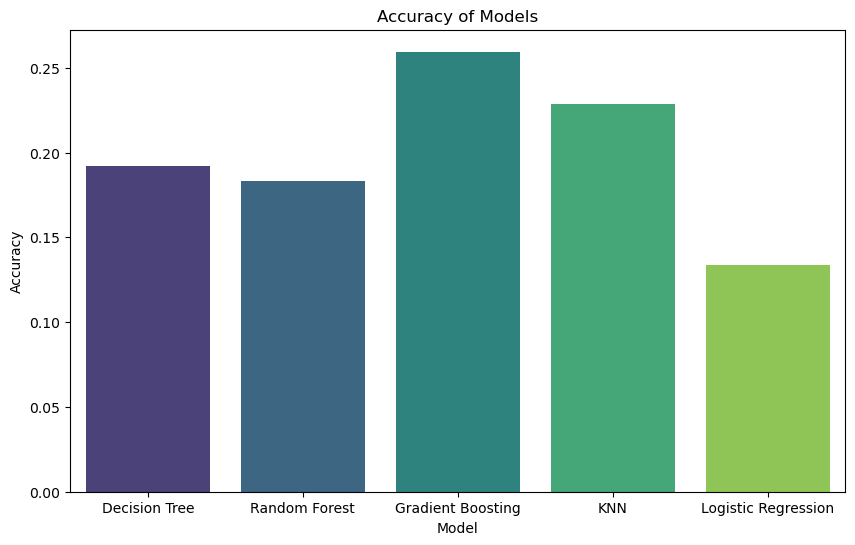

In [330]:
#plot all accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=['Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Logistic Regression'], y=[decision_acc, random_acc, gradient_acc, knn_acc, logistic_acc], palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

In [331]:
print('ค่า Accuracy ของแต่ละโมเดล')
print('Decision Tree:', decision_acc)
print('Random Forest:', random_acc)
print('Gradient Boosting:', gradient_acc)
print('KNN:', knn_acc)
print('Logistic Regression:', logistic_acc)

ค่า Accuracy ของแต่ละโมเดล
Decision Tree: 0.19233333333333333
Random Forest: 0.183
Gradient Boosting: 0.2595
KNN: 0.2285
Logistic Regression: 0.1335


จากผลการทดสอบวัดประสิทธิภาพของ Model พบว่า Gradient Boosting Model มีค่า Accuracy สูงที่สุด และ Logistic Regression มีค่า Accuracy ต่ำที่สุด

จะเห็นได้ว่าจากการทดสอบค่า Accuracy ยังไม่มีความแม่นยำมากพอ โดยอาจเกิดจาก Feature ที่เลือกไม่ได้มีความสำคัญมากพอและการ Imbalanced ของข้อมูล